IBNU RICHO KURNIAWAN

# HOME CREDIT SCORE CARD MODEL

**Project Background:**

Many people struggle to obtain loans due to inadequate or even non-existent credit histories. Unfortunately, this group often becomes a target for unfair lending practices. Home Credit strives to expand financial inclusion for those who are unbanked by providing a safe and positive borrowing experience. To ensure that this group has a good loan experience, Home Credit utilizes various alternative data to predict clients' repayment abilities. With this approach, they can ensure that individuals who are capable of repayment are not denied loans, and they offer loans with amounts, terms, and repayment schedules that are appropriate, thus helping clients achieve success.

## Load Dataset

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding and scaling
from sklearn.feature_selection import SelectKBest, chi2         # Feature selection
from sklearn.utils import resample                              # Re-sampling
from sklearn.model_selection import train_test_split            # Data splitting

# Machine learning models
from sklearn.linear_model import LogisticRegression             # Logistic Regression
from sklearn.naive_bayes import GaussianNB                      # Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier                 # Decision Tree
from sklearn.ensemble import RandomForestClassifier             # Random Forest
from sklearn.neighbors import KNeighborsClassifier              # K-Nearest Neighbor
from sklearn.neural_network import MLPClassifier                # Neural Network

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Application (Train)

In [ ]:
# Load the application training dataset
df_train = pd.read_csv("application_train.csv", sep=',')

# Display the shape of the dataset
print('This dataset has {} rows and {} columns.\n'.format(df_train.shape[0], df_train.shape[1]))
df_train.head()

This dataset has 307511 rows and 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

The dataset contains 307,511 rows and 122 columns, making it a large dataset likely used for analyzing credit or loan applications, with the goal of predicting whether a client will face repayment issues (TARGET = 1) or not (TARGET = 0). It includes demographic, financial, and behavioral information about clients, such as gender `CODE_GENDER`, number of children `CNT_CHILDREN`, age `DAYS_BIRTH`, loan type `NAME_CONTRACT_TYPE`, loan amount `AMT_CREDIT`, and annual repayment `AMT_ANNUITY`. Social data like education level `NAME_EDUCATION_TYPE` and urbanization of the client’s region `REGION_POPULATION_RELATIVE` are also included. However, some columns have missing values, such as car age `OWN_CAR_AGE` and external credit scores `EXT_SOURCE_1`, which need to be addressed through imputation or removal. There are also potential anomalies, such as unrealistic values in employment duration `DAYS_EMPLOYED`. Further analysis could focus on predicting creditworthiness using features like loan amount and external scores, segmenting clients by income or family status, and examining behavioral patterns like phone number changes `DAYS_LAST_PHONE_CHANGE`.

## Exploratory Data Analysis (EDA)

### Data Types

In [ ]:
print('Data types: \n')
df_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

In [ ]:
train = df_train.copy()

**Univearite : The Number of Customers Based on Their Repayment Abilities**

In [ ]:
# Define a mapping for decoding the sentiment labels
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}

# Function to decode sentiment based on the label
def decode_sentiment(label):
    return decode_map[int(label)]

# Apply the decoding function to the 'TARGET' column
train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
# Grouping the 'TARGET' column and aggregating the count
target_grp = (
    train[['TARGET']]
    .groupby("TARGET")
    .agg(COUNT=("TARGET", "count"))
    .sort_values(by="COUNT", ascending=False)
    .reset_index()
)

# Applying a background gradient for better visualization
target_grp.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


In [ ]:
grp = train['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Blues')

,TARGET,proportion
0,No Payment Difficulties,0.919271
1,Payment Difficulties,0.080729


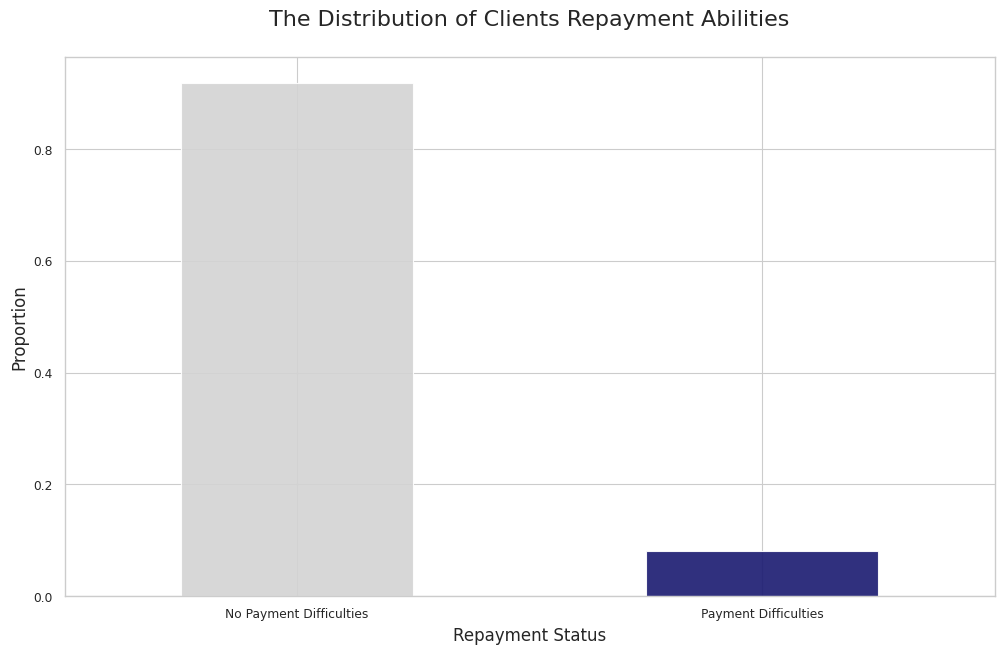

In [ ]:
# Set up the figure size
fig = plt.figure(figsize=(12, 7))

# Plot the bar chart
grp.plot(
    kind='bar',
    color=['lightgrey', 'midnightblue'],
    alpha=0.9,
    rot=0
)

# Add a title to the chart
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=16)

# Add labels for better clarity (optional)
plt.xlabel('Repayment Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Display the chart
plt.show()

The chart shows that the majority of clients (approximately 92%) fall into the "No Payment Difficulties" category, indicating that most clients are able to meet their payment obligations on time. Only a small proportion of clients (around 8%) experience "Payment Difficulties," meaning they struggle to fulfill their financial commitments. This highlights a significant imbalance in the data, with the majority of clients being reliable payers. While this suggests that the company's credit policies are effective, the small group of clients facing payment difficulties still poses a financial risk that requires attention and mitigation strategies.

### Bivariate: Categorical Features Vs Target

**Contract Type, Gender, Car Ownership Status, and Realty Ownership Status**

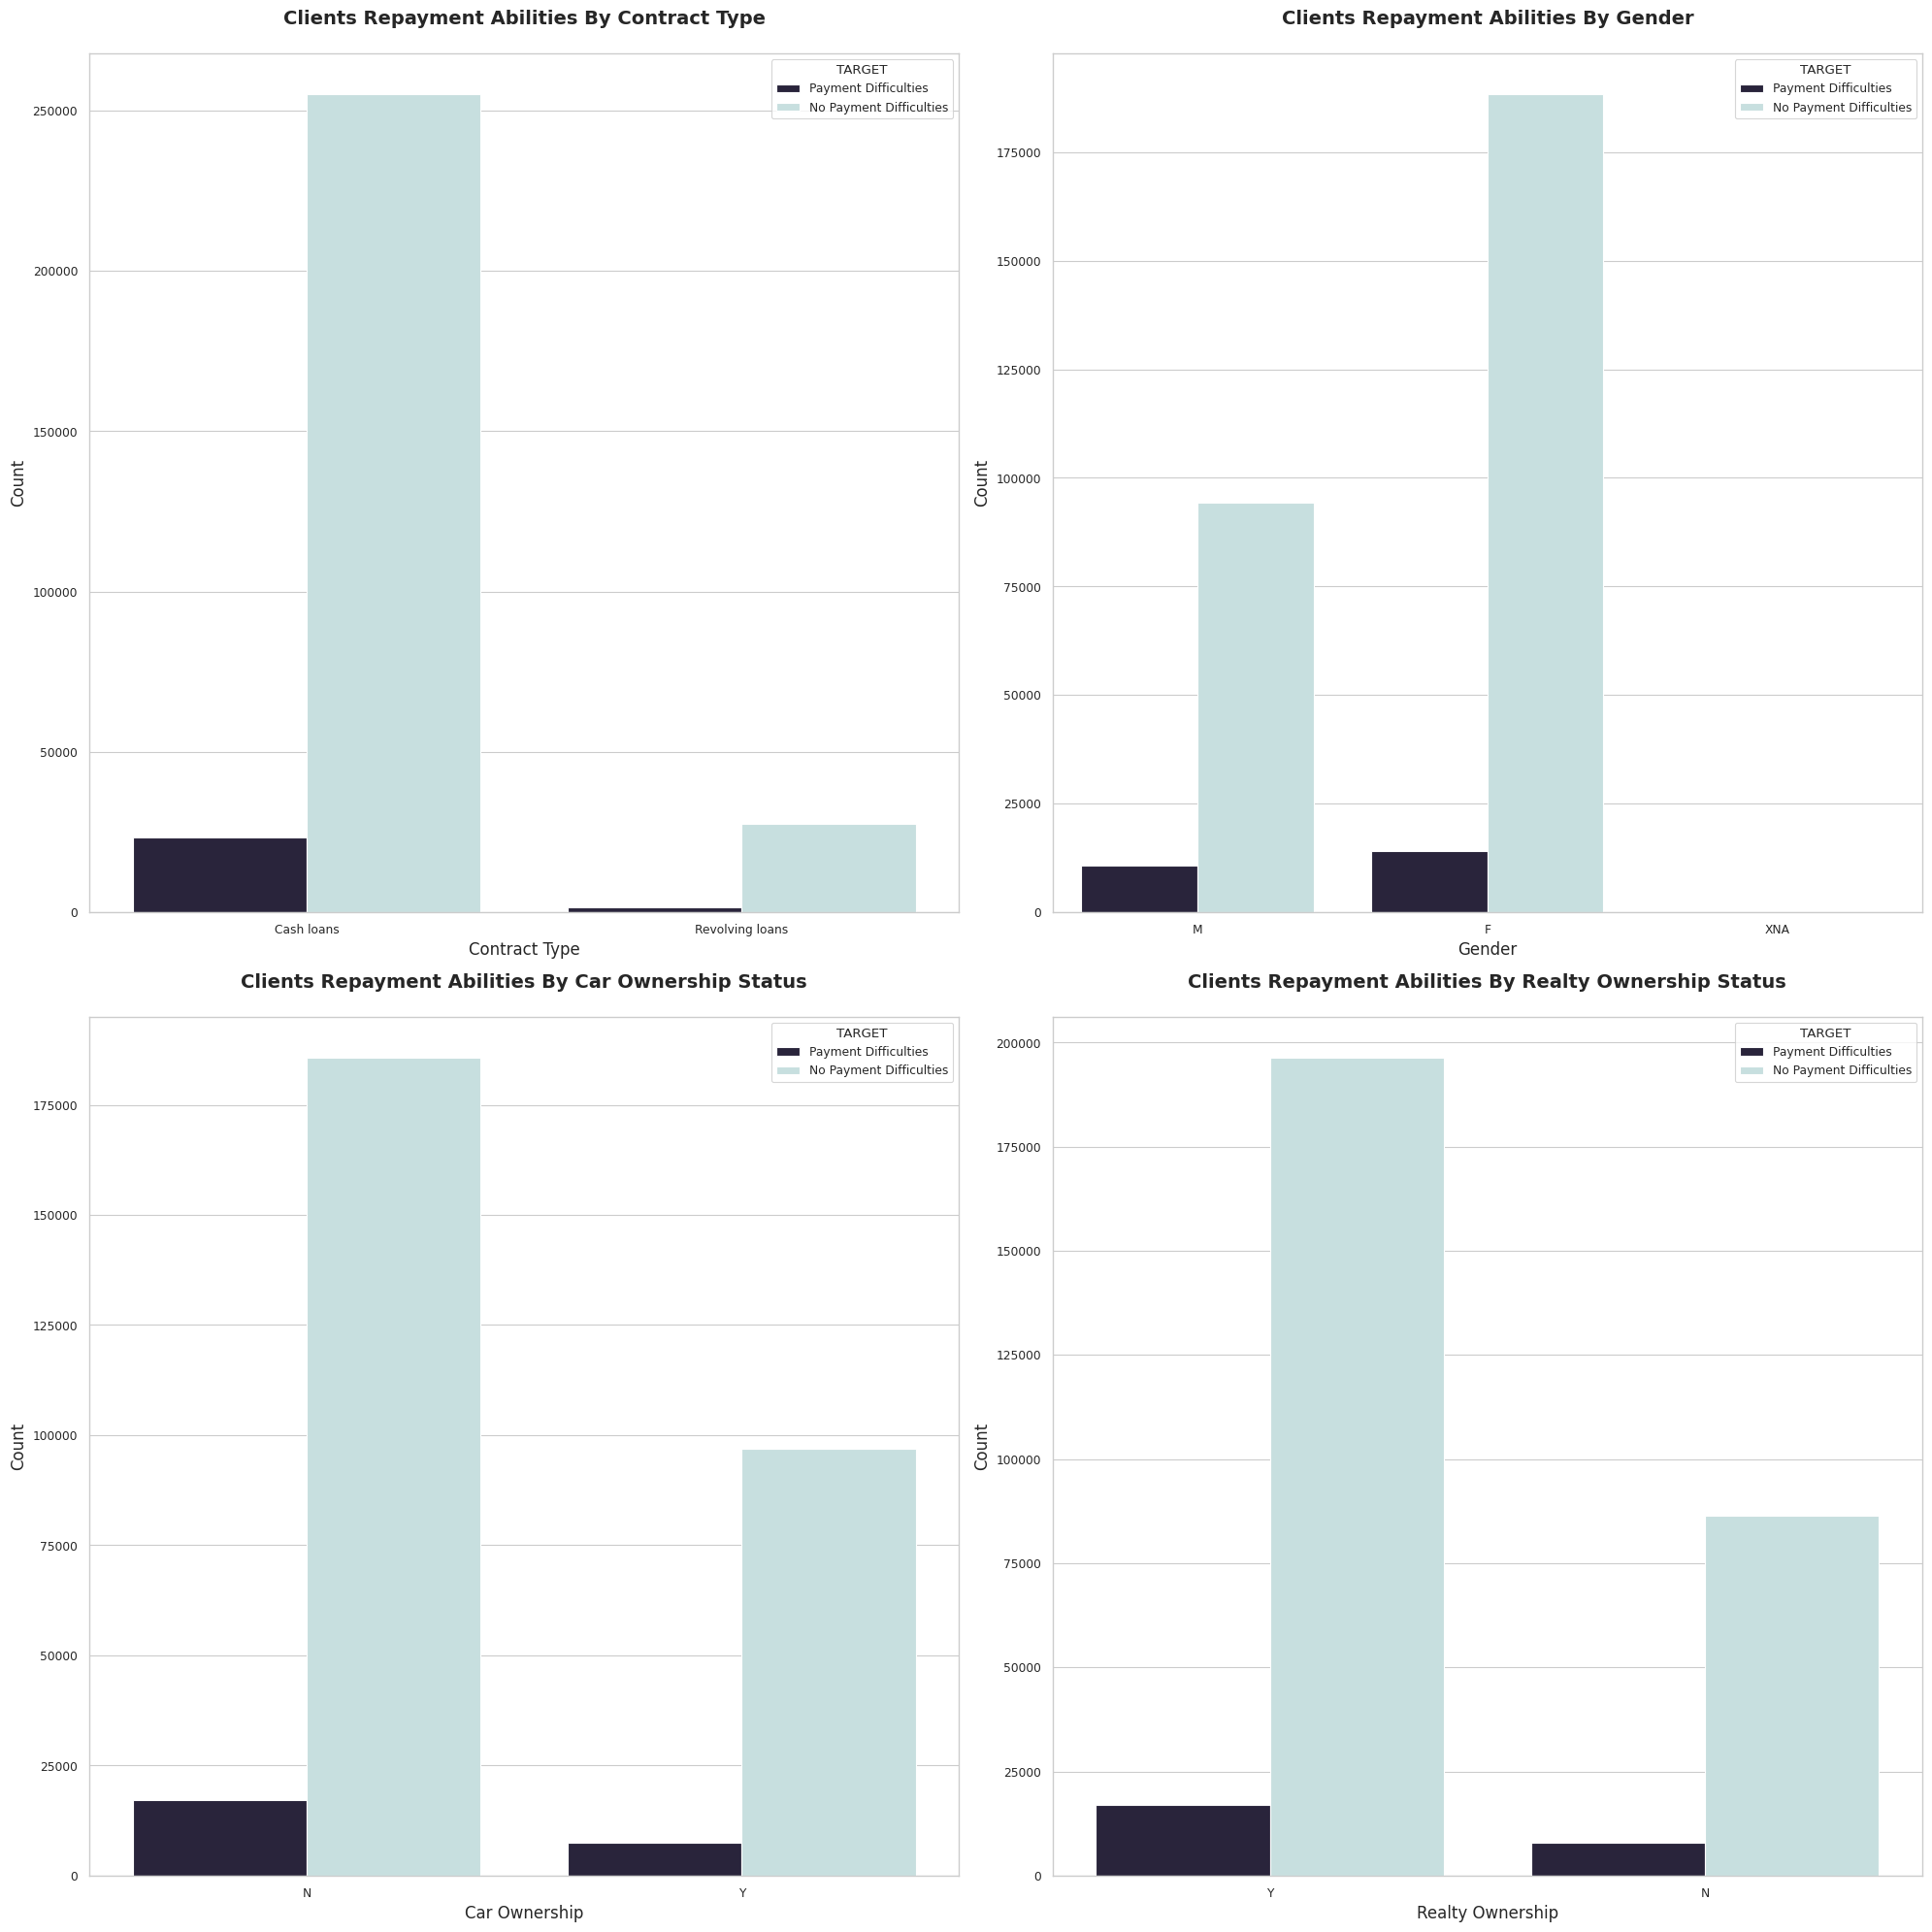

In [ ]:
# Set the style and context for the plots
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a 2x2 grid of subplots with a larger figure size
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Clients Repayment Abilities by Contract Type
sns.countplot(
    x='NAME_CONTRACT_TYPE',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[0][0]
)
ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
ax[0][0].set_xlabel('Contract Type', fontsize=12)
ax[0][0].set_ylabel('Count', fontsize=12)

# Plot 2: Clients Repayment Abilities by Gender
sns.countplot(
    x='CODE_GENDER',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[0][1]
)
ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
ax[0][1].set_xlabel('Gender', fontsize=12)
ax[0][1].set_ylabel('Count', fontsize=12)

# Plot 3: Clients Repayment Abilities by Car Ownership Status
sns.countplot(
    x='FLAG_OWN_CAR',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[1][0]
)
ax[1][0].set_title('Clients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
ax[1][0].set_xlabel('Car Ownership', fontsize=12)
ax[1][0].set_ylabel('Count', fontsize=12)

# Plot 4: Clients Repayment Abilities by Realty Ownership Status
sns.countplot(
    x='FLAG_OWN_REALTY',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[1][1]
)
ax[1][1].set_title('Clients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
ax[1][1].set_xlabel('Realty Ownership', fontsize=12)
ax[1][1].set_ylabel('Count', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Contract Type Vs Target**

In [ ]:
# Grouping data by 'NAME_CONTRACT_TYPE' and 'TARGET', and counting 'SK_ID_CURR'
ct = train.groupby(by=['NAME_CONTRACT_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Contract Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
ct = ct.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
ct.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
2,Revolving loans,No Payment Difficulties,27675
1,Cash loans,Payment Difficulties,23221
3,Revolving loans,Payment Difficulties,1604


**Gender Vs Target**

In [ ]:
train['CODE_GENDER'] = train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [ ]:
# Grouping data by 'CODE_GENDER' and 'TARGET', and counting 'SK_ID_CURR'
gt = train.groupby(by=['CODE_GENDER', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Gender')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
gt = gt.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
gt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,188278
2,Male,No Payment Difficulties,94404
1,Female,Payment Difficulties,14170
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [ ]:
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


It is evident that a significant number of loan applications come from women, with approximately **202,448** applications submitted by female clients compared to around **105,059** from male clients. However, a higher proportion of men, about **10%**, experienced difficulties in repaying their loans, while only around **7%** of women faced similar issues.

**Car Ownership Status Vs Target**

In [ ]:
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [ ]:
# Grouping data by 'FLAG_OWN_CAR' and 'TARGET', and counting 'SK_ID_CURR'
ot = train.groupby(by=['FLAG_OWN_CAR', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Car Ownership Status')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
ot = ot.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,185675
2,Yes,No Payment Difficulties,97011
1,No,Payment Difficulties,17249
3,Yes,Payment Difficulties,7576


In [ ]:
df_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


The majority of clients do not possess a car. Among those who do own a vehicle, approximately **8%** encountered difficulties in repaying their loans, while around **7%** of clients without a car faced similar repayment issues. However, the difference in repayment problems between the two groups is relatively minor.

**Realty Ownership Status Vs Target**

In [ ]:
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

In [ ]:
# Grouping data by realty ownership status and repayment ability
rt = train.groupby(by=['FLAG_OWN_REALTY', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying results
print('Clients Repayment Abilities By Realty Ownership Status')

# Sorting values and applying a gradient style for better visualization
rt = rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
2,Yes,No Payment Difficulties,196329
0,No,No Payment Difficulties,86357
3,Yes,Payment Difficulties,16983
1,No,Payment Difficulties,7842


In [ ]:
df_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


The majority of clients own a flat or house. Among those who have a property, approximately **8%** faced challenges in repaying their loans, while around **7%** of clients without a property encountered similar repayment issues. However, the difference in repayment difficulties between these two groups is relatively small.

**Suite Type, Income Type, Education Type, and Family Status**

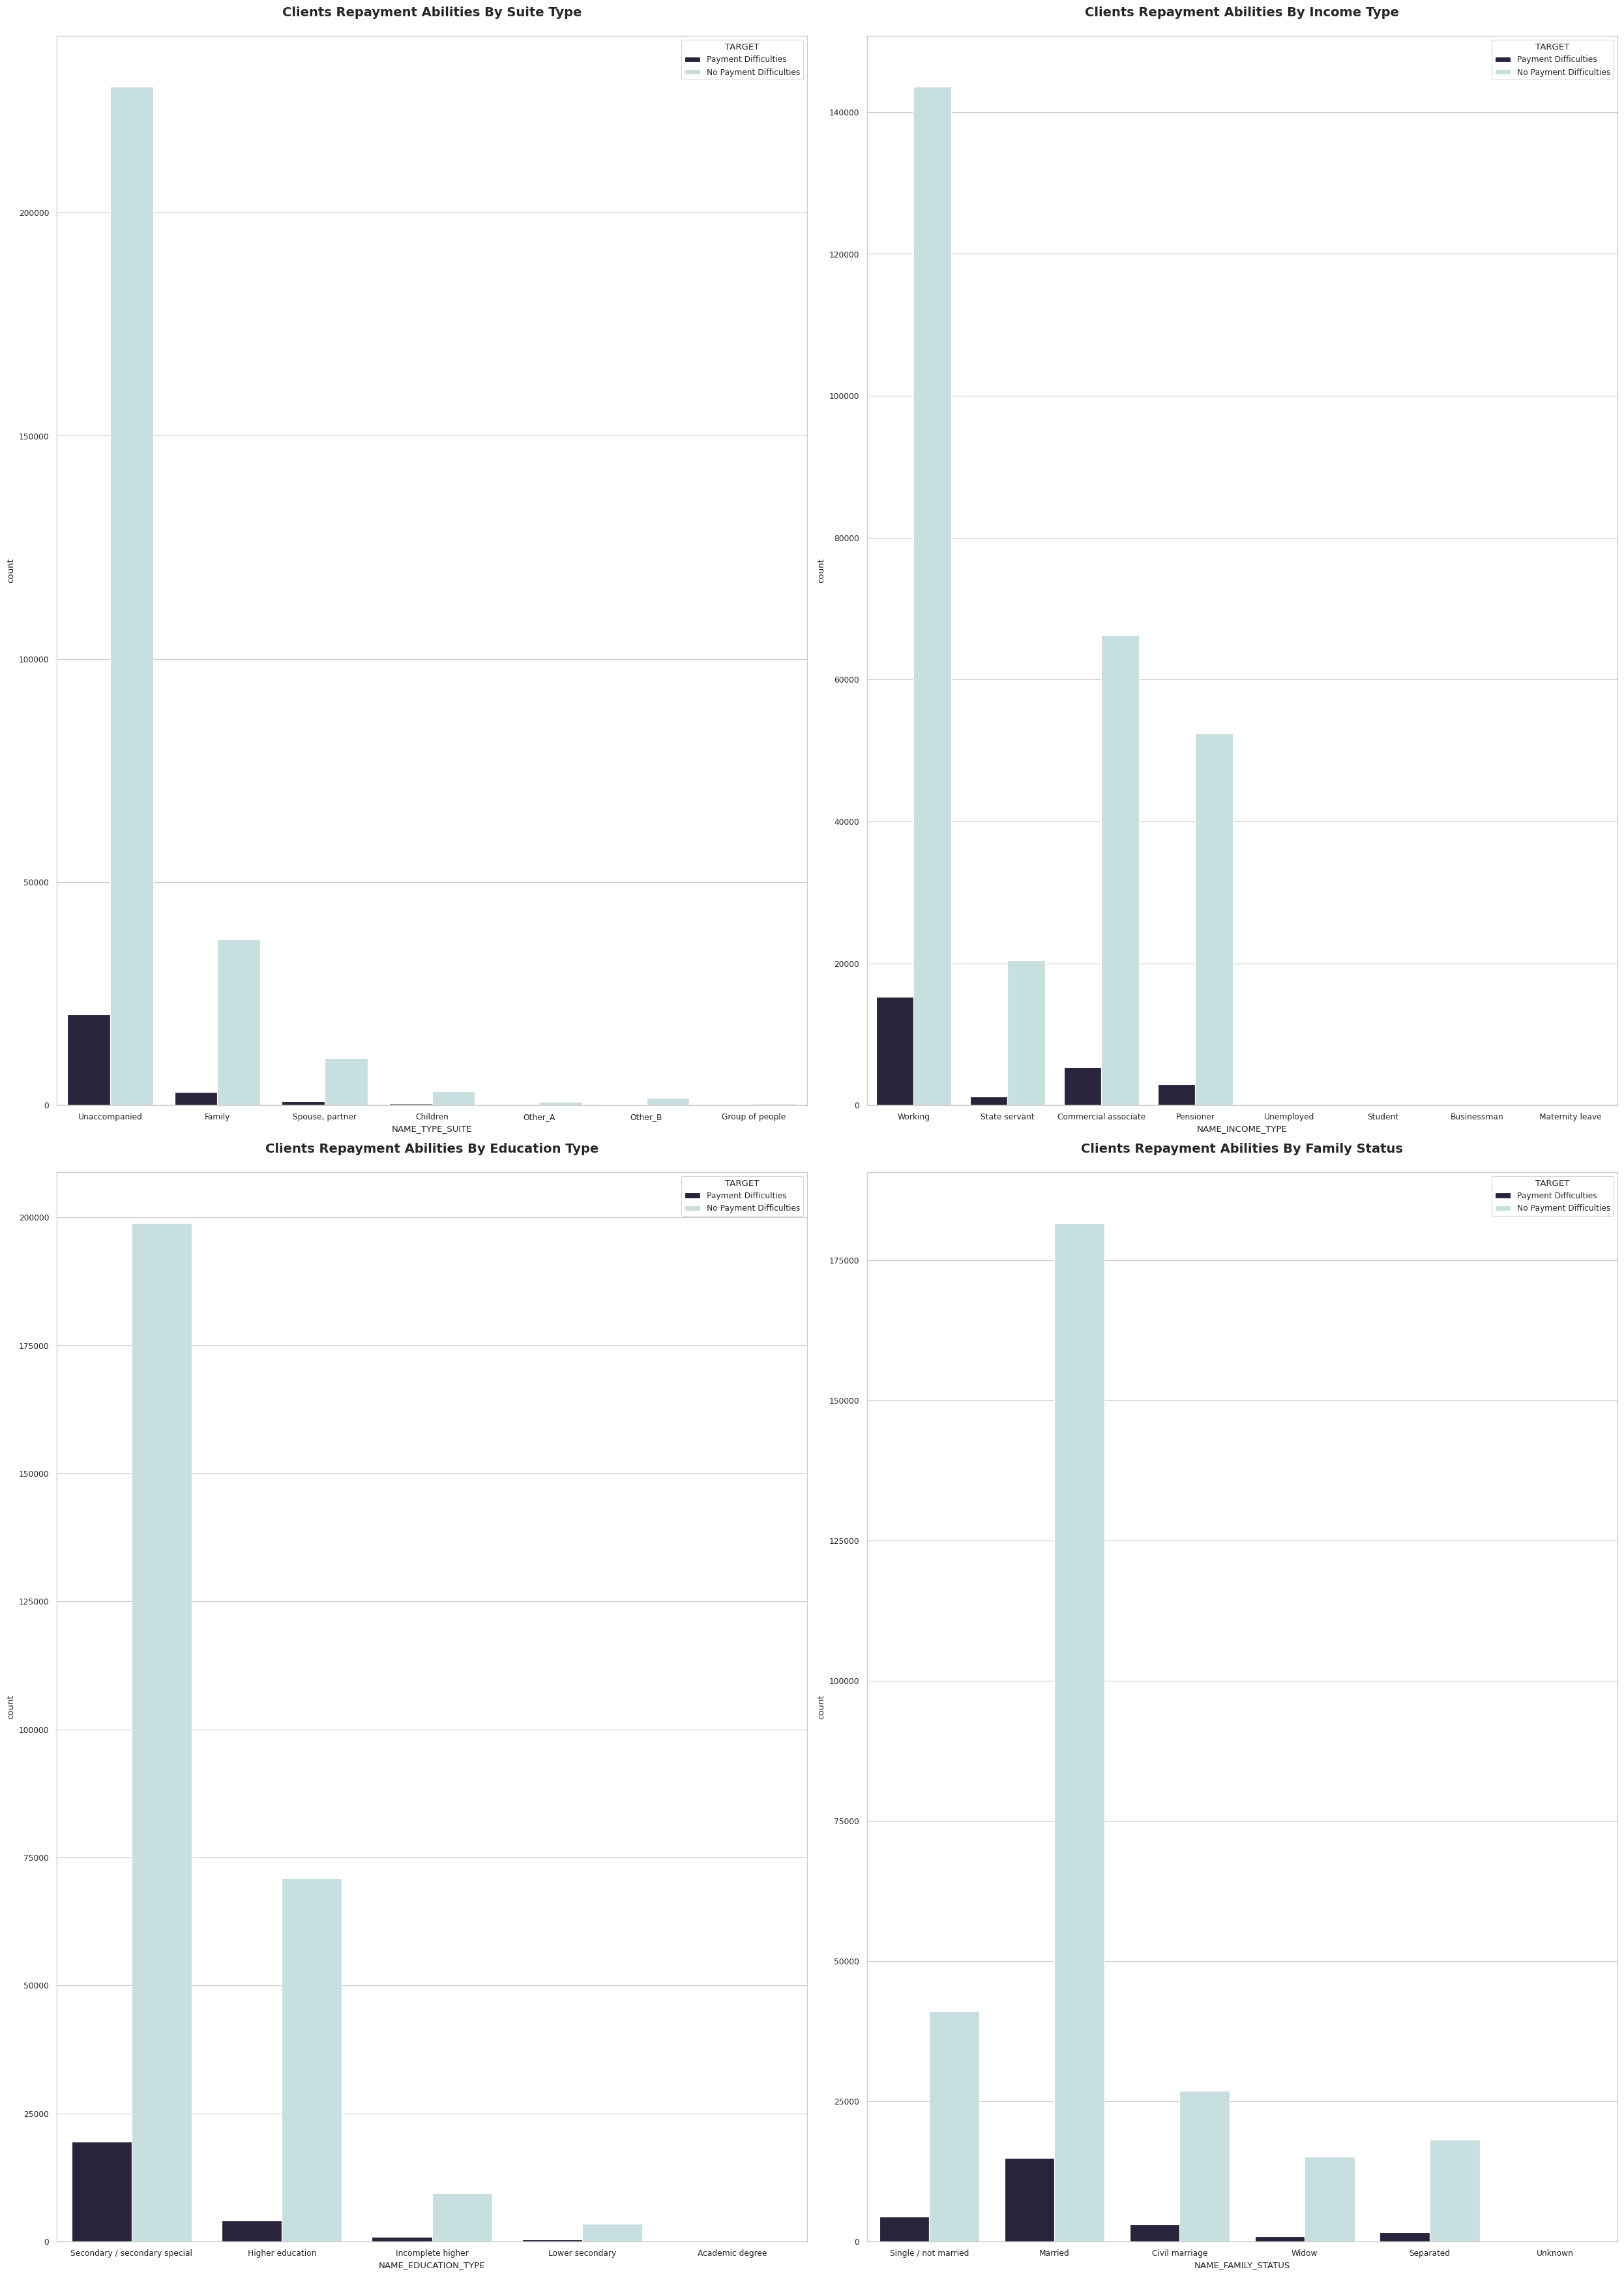

In [ ]:
# Setting the style and context for the visualizations
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Creating a 2x2 subplot figure
fig, ax = plt.subplots(2, 2, figsize=(25, 35))

# Plot 1: Clients Repayment Abilities By Suite Type
ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(
    x='NAME_TYPE_SUITE',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[0][0]
)

# Plot 2: Clients Repayment Abilities By Income Type
ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(
    x='NAME_INCOME_TYPE',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[0][1]
)

# Plot 3: Clients Repayment Abilities By Education Type
ax[1][0].set_title('Clients Repayment Abilities By Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(
    x='NAME_EDUCATION_TYPE',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[1][0]
)

# Plot 4: Clients Repayment Abilities By Family Status
ax[1][1].set_title('Clients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(
    x='NAME_FAMILY_STATUS',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r',
    ax=ax[1][1]
)

# Adjusting layout for better spacing
plt.tight_layout()


**Suite Type Vs Target**

In [ ]:
# Grouping data by 'NAME_TYPE_SUITE' and 'TARGET', and counting 'SK_ID_CURR'
st = train.groupby(by=['NAME_TYPE_SUITE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Suite Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
st = st.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
st.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,No Payment Difficulties,228189
2,Family,No Payment Difficulties,37140
13,Unaccompanied,Payment Difficulties,20337
10,"Spouse, partner",No Payment Difficulties,10475
0,Children,No Payment Difficulties,3026
3,Family,Payment Difficulties,3009
8,Other_B,No Payment Difficulties,1596
11,"Spouse, partner",Payment Difficulties,895
6,Other_A,No Payment Difficulties,790
4,Group of people,No Payment Difficulties,248


In [ ]:
df_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)


,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Clients who are accompanied by others during their loan application process tend to have a higher percentage of repayment difficulties, with approximately **10%** experiencing challenges in meeting their loan obligations.


**Income Type Vs Target**

In [ ]:
# Grouping data by 'NAME_INCOME_TYPE' and 'TARGET', and counting 'SK_ID_CURR'
rt = train.groupby(by=['NAME_INCOME_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Income Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
rt = rt.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,No Payment Difficulties,143550
1,Commercial associate,No Payment Difficulties,66257
5,Pensioner,No Payment Difficulties,52380
7,State servant,No Payment Difficulties,20454
13,Working,Payment Difficulties,15224
2,Commercial associate,Payment Difficulties,5360
6,Pensioner,Payment Difficulties,2982
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18
10,Unemployed,No Payment Difficulties,14


In [ ]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


It is evident that clients with a working income type represent the majority of loan applicants, totaling approximately **158,774** applications. Clients categorized as businessmen and students have not reported anyBased on the information provided, the key insights are:

#### Loan Applications by Income Type
The majority of loan applications come from clients with an income type of **working**, accounting for around **158,774** applications.

#### Repayment Abilities by Income Type
- Clients with income types of **businessman** and **student** have **no difficulty** in repaying their loans.
- Clients with income types of **maternity leaves** and **unemployed** have the **highest percentage** (around **40%** and **36%** respectively) of **repayment difficulties**.

#### Repayment Abilities by Accompaniment
Clients who are **accompanied by others** when applying for a loan have a **higher percentage** (around **10%**) of **repayment difficulties** compared to those who apply alone.

#### Repayment Abilities by Property Ownership
- The majority of clients **own a flat or house**.
- Clients who **own a property** have a slightly **higher percentage** (around **8%**) of **repayment difficulties** compared to those who **do not own a property** (around **7%**), but the difference is not very significant.

**Education Type Vs Target**

In [ ]:
# Grouping data by 'NAME_EDUCATION_TYPE' and 'TARGET', and counting 'SK_ID_CURR'
et = train.groupby(by=['NAME_EDUCATION_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Education Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
et = et.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
et.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,No Payment Difficulties,198867
2,Higher education,No Payment Difficulties,70854
9,Secondary / secondary special,Payment Difficulties,19524
4,Incomplete higher,No Payment Difficulties,9405
3,Higher education,Payment Difficulties,4009
6,Lower secondary,No Payment Difficulties,3399
5,Incomplete higher,Payment Difficulties,872
7,Lower secondary,Payment Difficulties,417
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3


In [ ]:
df_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


A significant number of loan applications, approximately **218,000**, are submitted by clients with **secondary education**, followed by those with **higher education**, who account for around **75,000** applications.

Notably, clients with an education level of **lower secondary** exhibit the highest percentage of repayment difficulties, with about **10%** experiencing challenges in meeting their loan obligations.

**Family Status Vs Target**

In [ ]:
# Grouping data by 'NAME_FAMILY_STATUS' and 'TARGET', and counting 'SK_ID_CURR'
ft = train.groupby(by=['NAME_FAMILY_STATUS', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Family Status')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
ft = ft.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
ft.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,No Payment Difficulties,181582
6,Single / not married,No Payment Difficulties,40987
0,Civil marriage,No Payment Difficulties,26814
4,Separated,No Payment Difficulties,18150
9,Widow,No Payment Difficulties,15151
3,Married,Payment Difficulties,14850
7,Single / not married,Payment Difficulties,4457
1,Civil marriage,Payment Difficulties,2961
5,Separated,Payment Difficulties,1620
10,Widow,Payment Difficulties,937


In [ ]:
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


Clients who are **married** represent a significant portion of loan applications, totaling approximately **196,432**.

In contrast, clients with a family status of **civil marriage** and **single** exhibit the highest percentage of repayment difficulties, with around **9%** facing challenges in meeting their loan obligations.

**Housing Type Vs Target**

In [ ]:
# Grouping data by 'NAME_HOUSING_TYPE' and 'TARGET', and counting 'SK_ID_CURR'
ht = train.groupby(by=['NAME_HOUSING_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Housing Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
ht = ht.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
ht.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
10,With parents,No Payment Difficulties,13104
4,Municipal apartment,No Payment Difficulties,10228
8,Rented apartment,No Payment Difficulties,4280
6,Office apartment,No Payment Difficulties,2445
11,With parents,Payment Difficulties,1736
0,Co-op apartment,No Payment Difficulties,1033
5,Municipal apartment,Payment Difficulties,955
9,Rented apartment,Payment Difficulties,601


In [ ]:
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Clients living in **rented apartments** show the highest percentage of repayment difficulties, with approximately **12%** experiencing challenges in meeting their loan obligations.

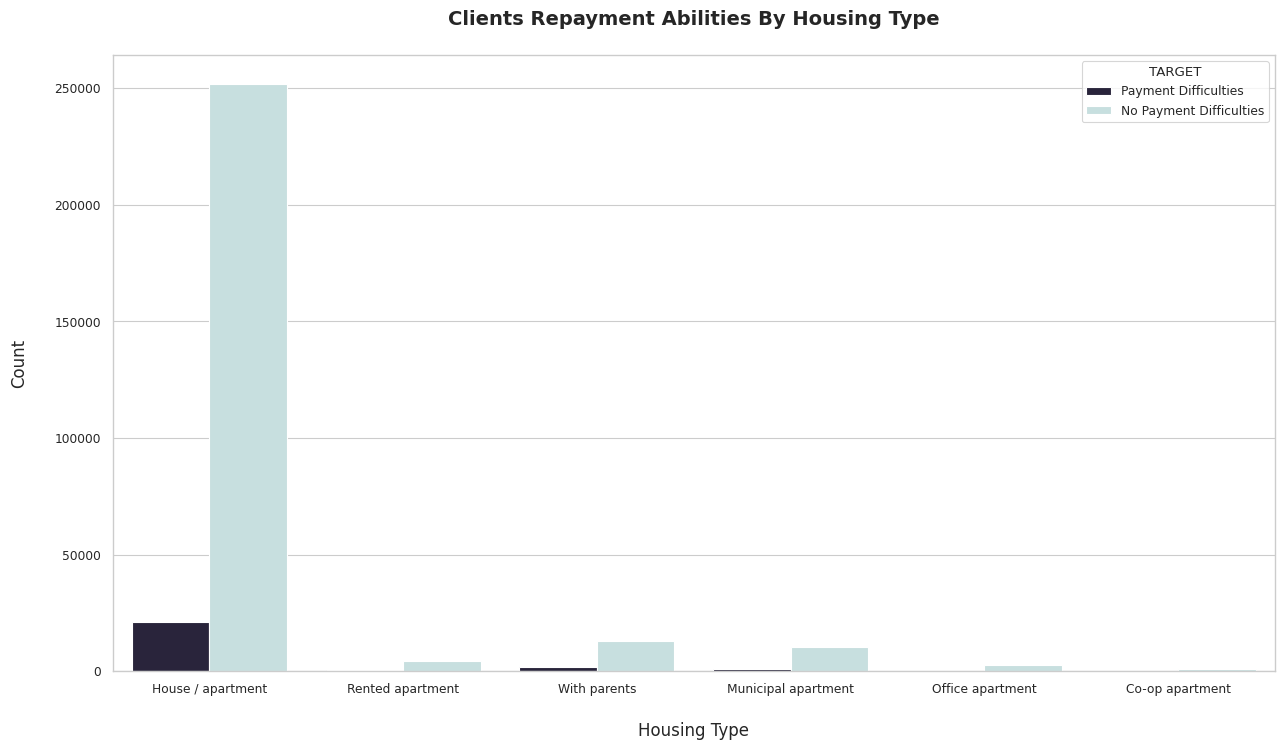

In [ ]:
# Visualization of Clients' Repayment Abilities by Housing Type
plt.figure(figsize=(15, 8))

# Creating a count plot with 'NAME_HOUSING_TYPE' on the x-axis and 'TARGET' as the hue
fig = sns.countplot(
    x='NAME_HOUSING_TYPE',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r'
)

# Adding a title and labels with proper formatting
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)
plt.ylabel('Count\n', fontsize=12)

# Display the plot
plt.show()

Clients living in **House / apartments** has the highest number of loan apllications equal to 272K.

**Occupation Type Vs Target**

In [ ]:
# Grouping data by 'OCCUPATION_TYPE' and 'TARGET', and counting 'SK_ID_CURR'
ot = train.groupby(by=['OCCUPATION_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Occupation Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
ot = ot.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,No Payment Difficulties,49348
28,Sales staff,No Payment Difficulties,29010
6,Core staff,No Payment Difficulties,25832
20,Managers,No Payment Difficulties,20043
8,Drivers,No Payment Difficulties,16496
12,High skill tech staff,No Payment Difficulties,10679
0,Accountants,No Payment Difficulties,9339
22,Medicine staff,No Payment Difficulties,7965
32,Security staff,No Payment Difficulties,5999
17,Laborers,Payment Difficulties,5838


In [ ]:
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


A substantial number of loan applications, totaling around **55,000**, are submitted by clients employed as **laborers**.

Among these, clients classified as **low-skill laborers** have the highest percentage of repayment difficulties, with approximately **17%** facing challenges in fulfilling their loan obligations.

**Process Day Vs Target**

In [ ]:
# Grouping data by 'WEEKDAY_APPR_PROCESS_START' and 'TARGET', and counting 'SK_ID_CURR'
pt = train.groupby(by=['WEEKDAY_APPR_PROCESS_START', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Process Day')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
pt = pt.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
pt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
10,TUESDAY,No Payment Difficulties,49400
12,WEDNESDAY,No Payment Difficulties,47696
2,MONDAY,No Payment Difficulties,46780
8,THURSDAY,No Payment Difficulties,46493
0,FRIDAY,No Payment Difficulties,46237
4,SATURDAY,No Payment Difficulties,31182
6,SUNDAY,No Payment Difficulties,14898
11,TUESDAY,Payment Difficulties,4501
13,WEDNESDAY,Payment Difficulties,4238
1,FRIDAY,Payment Difficulties,4101


In [ ]:
df_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


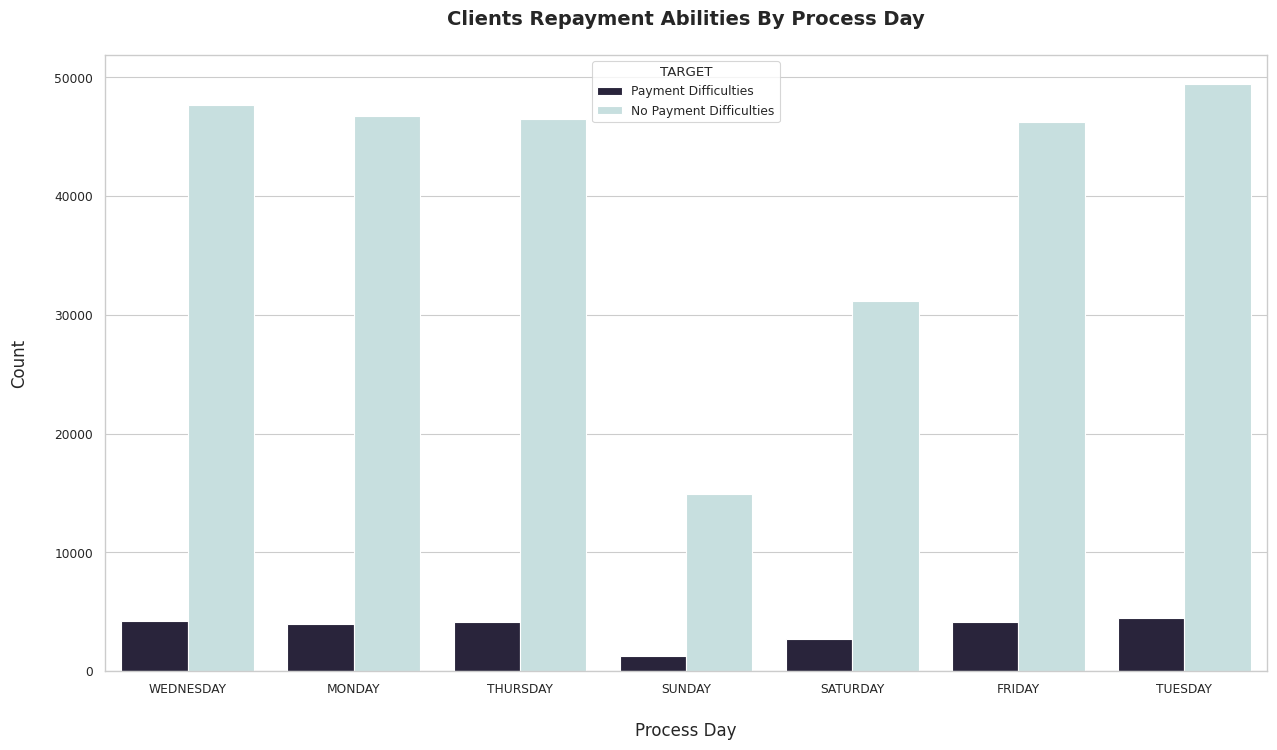

In [ ]:
# Visualization of Clients' Repayment Abilities by Process Day
plt.figure(figsize=(15, 8))

# Creating a count plot with 'WEEKDAY_APPR_PROCESS_START' on the x-axis and 'TARGET' as the hue
fig = sns.countplot(
    x='WEEKDAY_APPR_PROCESS_START',
    data=train,
    hue='TARGET',
    palette='ch:start=0.2,rot=-.3_r'
)

# Adding a title and labels with proper formatting
plt.title('Clients Repayment Abilities By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)
plt.ylabel('Count\n', fontsize=12)

# Display the plot
plt.show()

Each day of loan application processing shows a consistent percentage of repayment difficulties, ranging from approximately **7% to 8%** for clients classified as **TARGET = 1**, indicating challenges in repaying their loans.

**Organization Type Vs Target**

In [ ]:
# Grouping data by 'ORGANIZATION_TYPE' and 'TARGET', and counting 'SK_ID_CURR'
tt = train.groupby(by=['ORGANIZATION_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Displaying the title
print('Clients Repayment Abilities By Suite Type')

# Sorting the grouped data by 'SK_ID_CURR' in descending order
tt = tt.sort_values(by='SK_ID_CURR', ascending=False)

# Applying a gradient background for better visualization
tt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
10,Business Entity Type 3,No Payment Difficulties,61669
114,XNA,No Payment Difficulties,52384
84,Self-employed,No Payment Difficulties,34504
66,Other,No Payment Difficulties,15408
60,Medicine,No Payment Difficulties,10456
22,Government,No Payment Difficulties,9678
8,Business Entity Type 2,No Payment Difficulties,9653
78,School,No Payment Difficulties,8367
102,Trade: type 7,No Payment Difficulties,7091
56,Kindergarten,No Payment Difficulties,6396


In [ ]:
df_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


Clients associated with the **transport organization type 3** exhibit the highest percentage of repayment difficulties, with approximately **15%** facing challenges in meeting their loan obligations.

### Bivariate: Numerical Features Vs Target

**Amount Credit of the Loan Vs Target**

<ipython-input-150-5d01667ca9c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


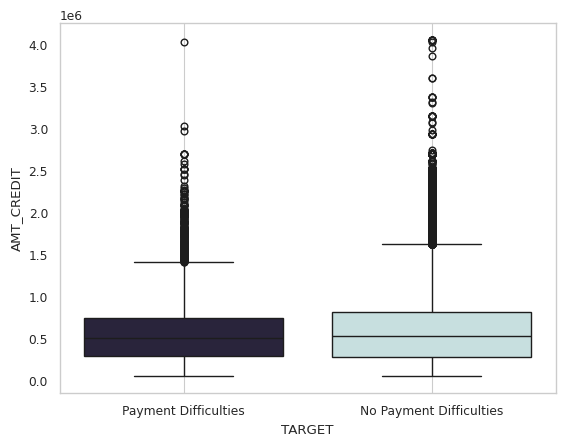

In [ ]:
# Boxplot visualization of 'AMT_CREDIT' by 'TARGET'
sns.boxplot(
    x='TARGET',
    y='AMT_CREDIT',
    data=train,
    palette='ch:start=0.2,rot=-.3_r'
)

# Adding gridlines for better readability
plt.grid()

# Display the plot
plt.show()

The **median credit amount** for clients without payment difficulties is slightly higher than that of clients who face repayment challenges. This suggests that clients with **larger loan amounts** tend to have a slightly better ability to repay their loans compared to those with smaller loan amounts.


**Amount Income Vs Target**

<ipython-input-151-41c5dd16dc4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


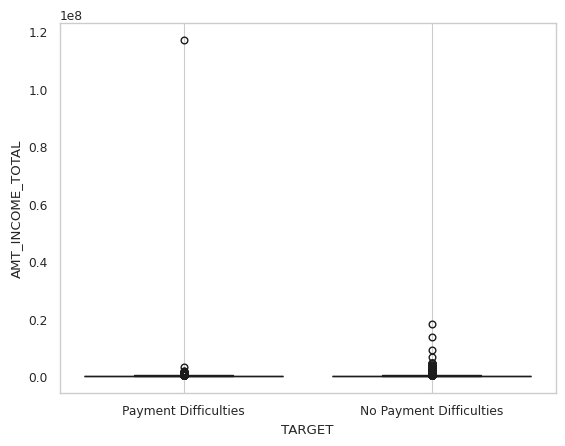

In [ ]:
# Boxplot visualization of 'AMT_INCOME_TOTAL' by 'TARGET'
sns.boxplot(
    x='TARGET',
    y='AMT_INCOME_TOTAL',
    data=train,
    palette='ch:start=0.2,rot=-.3_r'
)

# Adding gridlines for better readability
plt.grid()

# Display the plot
plt.show()

Both clients experiencing payment difficulties and those without such issues tend to have similar values. However, as a client's income increases, the likelihood of them being able to repay their loans without difficulties also rises.


**Age Vs target**

In [ ]:
no_age = df_train[df_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365

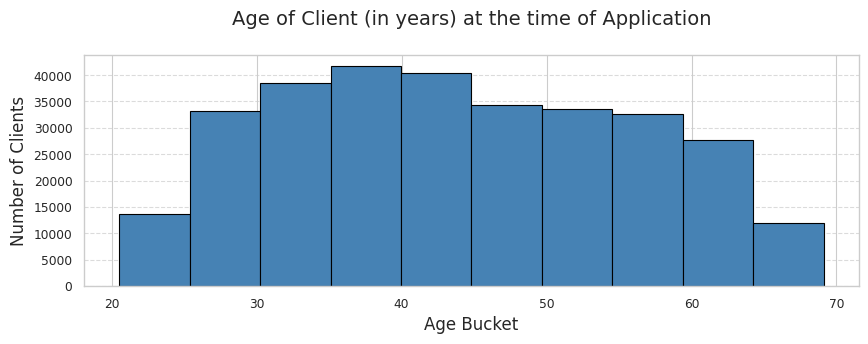

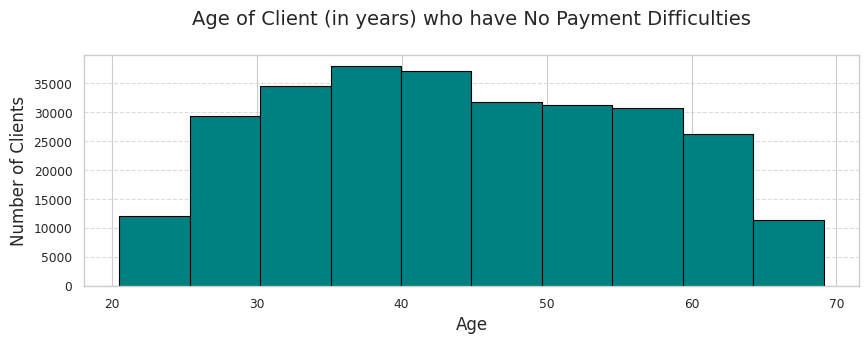

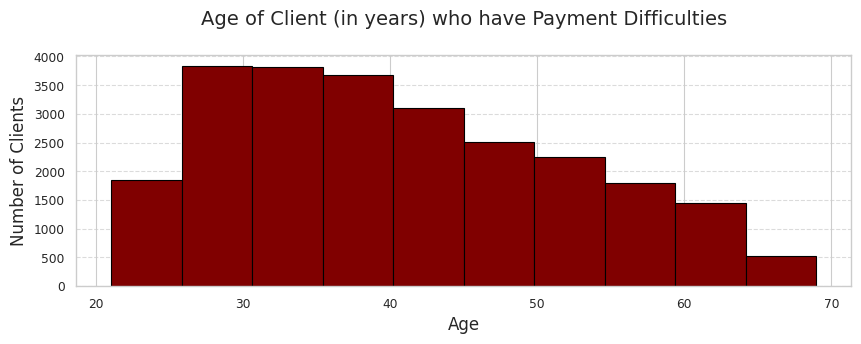

In [ ]:
# Histogram: Age of Clients (in years) at the time of Application
plt.figure(figsize=(10, 3))
plt.hist(df_train['DAYS_BIRTH'].values / -365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n', fontsize=14)
plt.xlabel('Age Bucket', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.show()

# Histogram: Age of Clients with No Payment Difficulties
plt.figure(figsize=(10, 3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.show()

# Histogram: Age of Clients with Payment Difficulties
plt.figure(figsize=(10, 3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.show()

The majority of loan applicants fall within the **35-40 age range**, followed closely by those aged **40-45 years**. In contrast, the number of applicants under **25 years old** or over **65 years old** is significantly lower.

Clients without payment difficulties are predominantly in the **35-45 age range**, whereas those experiencing repayment challenges are mostly in the **25-35 age range**. This indicates a potential correlation between age and repayment capability.

### Multivariat Visualization


#### Grouped by Realty Ownership Status

**1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status**

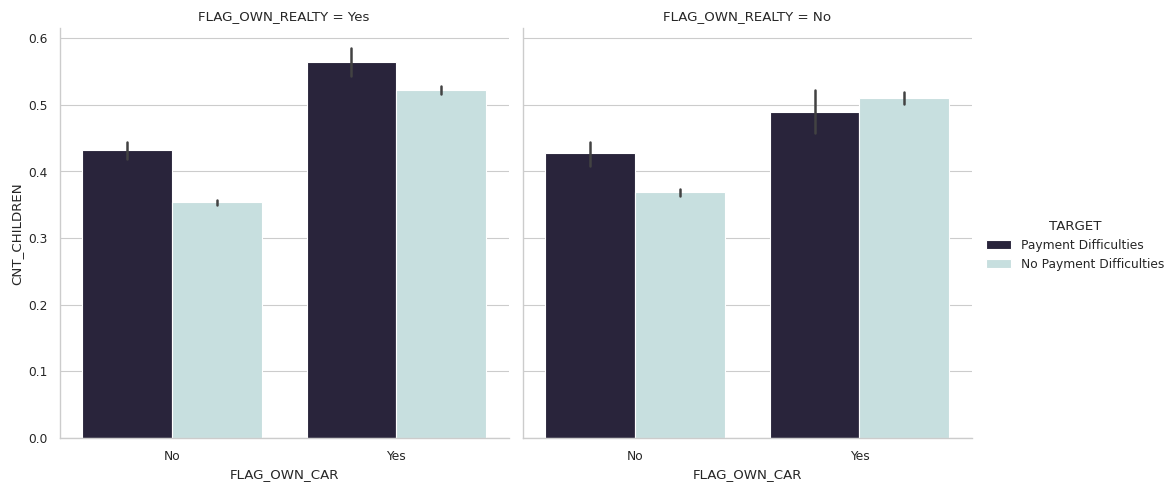

In [ ]:
# Catplot visualization: Relationship between 'FLAG_OWN_CAR', 'CNT_CHILDREN', and 'TARGET'
sns.catplot(
    x='FLAG_OWN_CAR',
    y='CNT_CHILDREN',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Display the plot
plt.show()

Clients who own both a car and a house/flat tend to face greater difficulties in repaying loans when they have a higher number of children, compared to clients who do not own a house/flat.

**2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status**

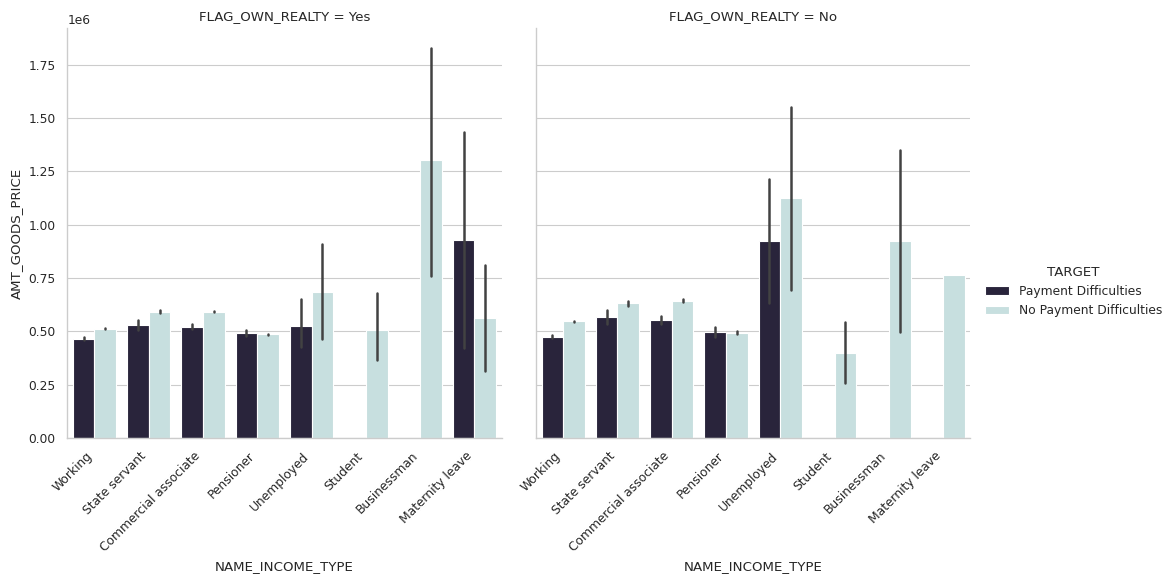

In [ ]:
# Catplot visualization: Relationship between 'NAME_INCOME_TYPE', 'AMT_GOODS_PRICE', and 'TARGET'
fig = sns.catplot(
    x='NAME_INCOME_TYPE',
    y='AMT_GOODS_PRICE',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Rotate x-axis labels for better readability
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

Clients with an income type categorized as **maternity leave** and who own a house or flat (FLAG_OWN_REALTY = Yes) are more likely to face difficulties in repaying loans compared to those who do not own a house or flat (FLAG_OWN_REALTY = No).

**3. Family Status, Amount of Income, Target, and House/Flat Ownership Status**

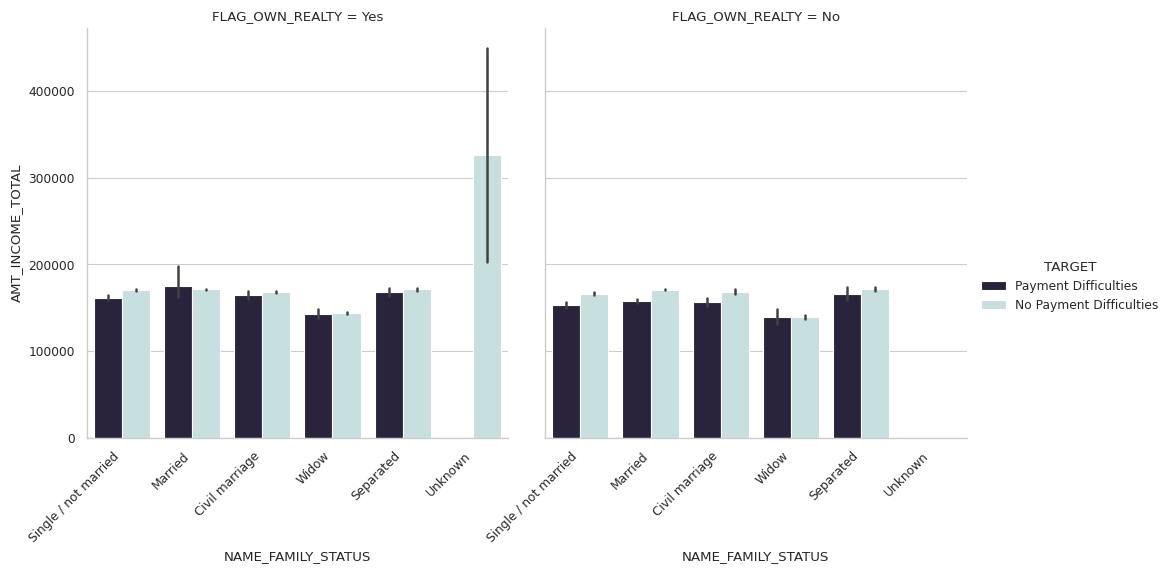

In [ ]:
# Catplot visualization: Relationship between 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', and 'TARGET'
fig = sns.catplot(
    x='NAME_FAMILY_STATUS',
    y='AMT_INCOME_TOTAL',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Rotate x-axis labels for better readability
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

Married clients who own a house or flat (FLAG_OWN_REALTY = Yes) tend to face more difficulties in repaying loans when they have a medium level of income, compared to married clients who do not own a house or flat (FLAG_OWN_REALTY = No).

#### Grouped by Car Ownership Status


**1. Contract Type, The Number of Children, Target, and Car Ownership Status**

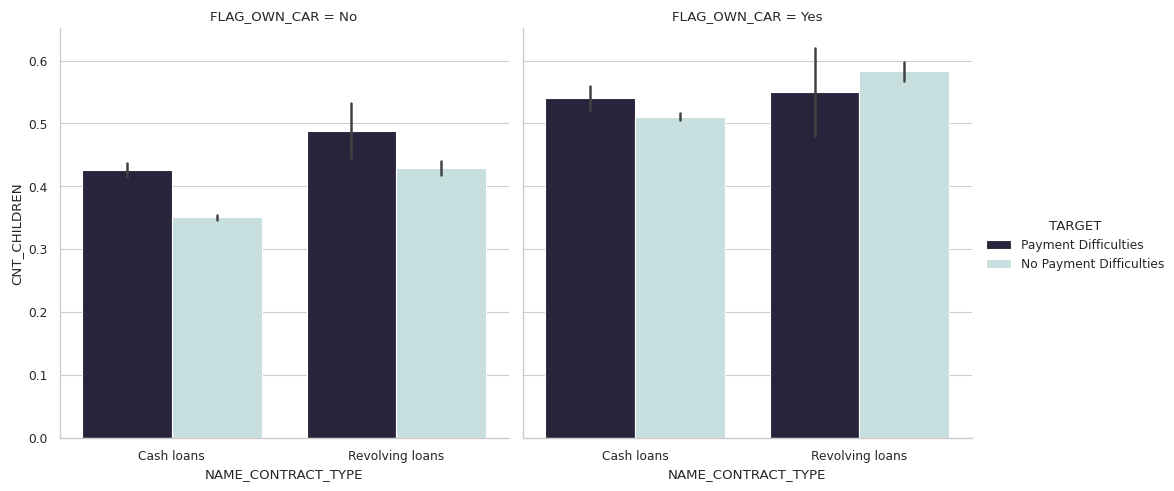

In [ ]:
# Catplot visualization: Relationship between 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN', and 'TARGET'
sns.catplot(
    x='NAME_CONTRACT_TYPE',
    y='CNT_CHILDREN',
    hue='TARGET',
    col='FLAG_OWN_CAR',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Display the plot
plt.show()

Clients with revolving loans who do not own a car (FLAG_OWN_CAR = No) are more likely to encounter difficulties in repaying their loans compared to those who do own a car (FLAG_OWN_CAR = Yes).

#### Grouped by Contract Type

**1. Income Type, Amount of Credit, Target, and Contract Type**

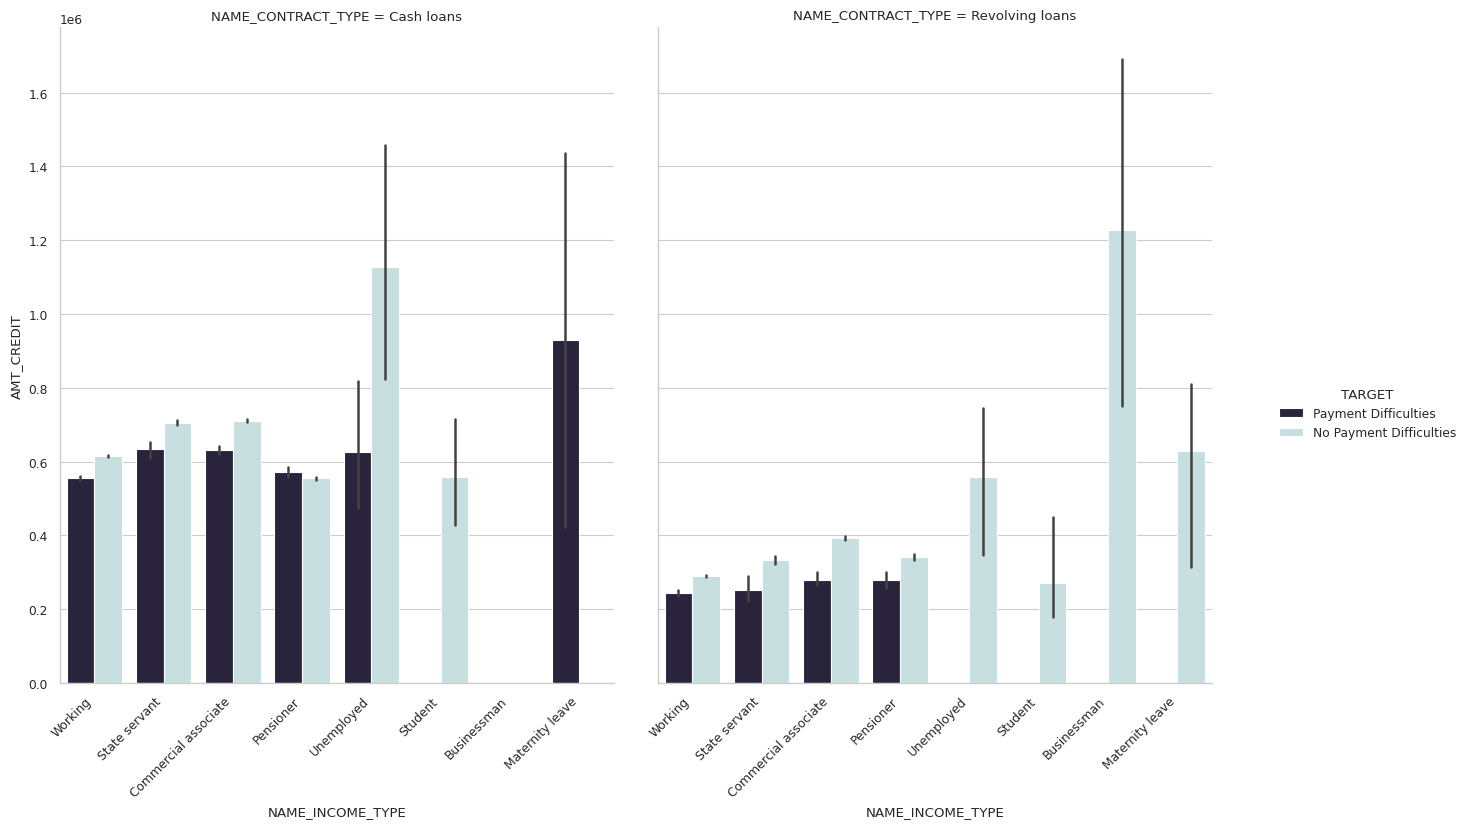

In [ ]:
# Catplot visualization: Relationship between 'NAME_INCOME_TYPE', 'AMT_CREDIT', and 'TARGET'
fig = sns.catplot(
    x='NAME_INCOME_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='NAME_CONTRACT_TYPE',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Rotate x-axis labels for better readability
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Adjust the figure size
plt.gcf().set_size_inches(15, 8)

# Display the plot
plt.show()

For clients on maternity leave with cash loans, all of them face difficulties repaying loans when the credit amount is medium. However, clients on maternity leave with revolving loans experience no repayment issues.

Unemployed clients with cash loans show that over 50% struggle to repay loans with a medium credit amount. In contrast, unemployed clients with revolving loans have no repayment difficulties.

Student clients, regardless of whether they have cash loans or revolving loans, do not face any repayment challenges for loans with low to medium credit amounts.

#### Grouped by Rating of Region where Client Lives


**1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

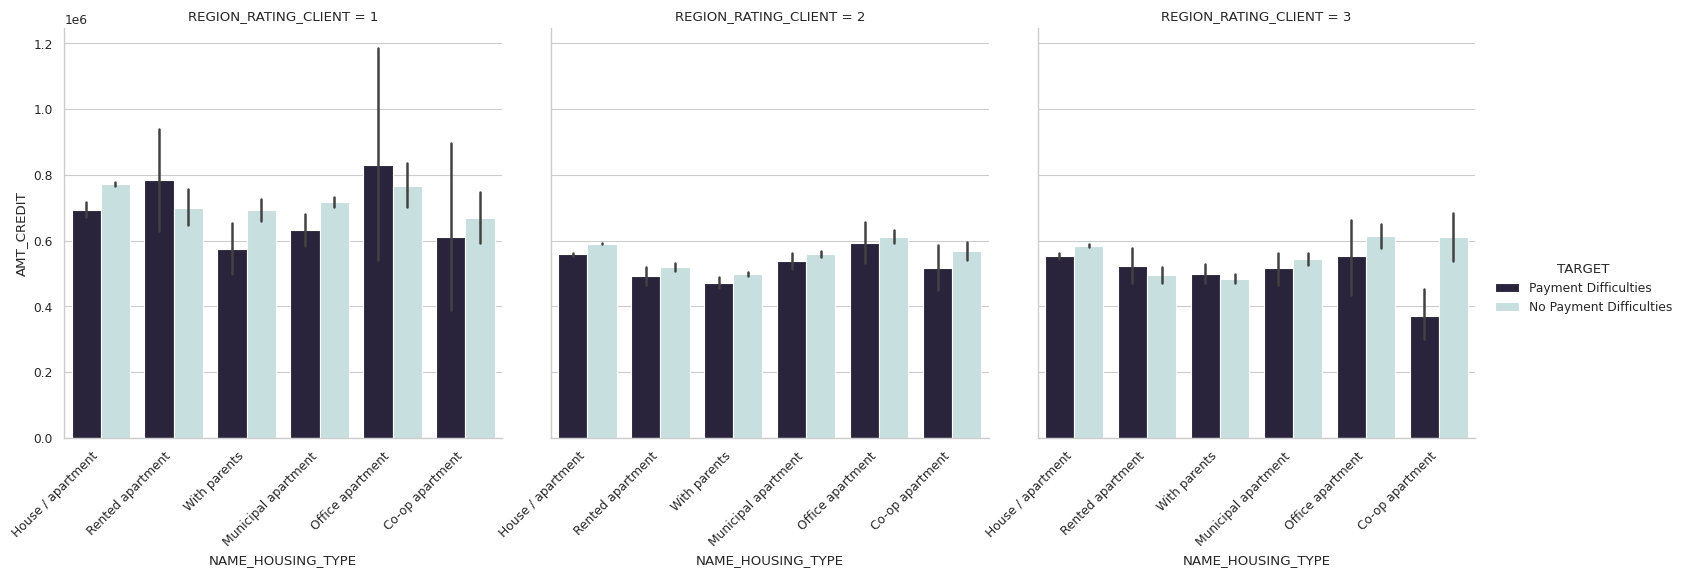

In [ ]:
# Catplot visualization: Relationship between 'NAME_HOUSING_TYPE', 'AMT_CREDIT', and 'TARGET'
fig = sns.catplot(
    x='NAME_HOUSING_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Rotate x-axis labels for better readability
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

Clients residing in rented or office apartments, located in regions with a rating of 1, tend to face greater challenges in repaying loans for a medium credit amount compared to clients living in regions with a rating of 2.

**2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

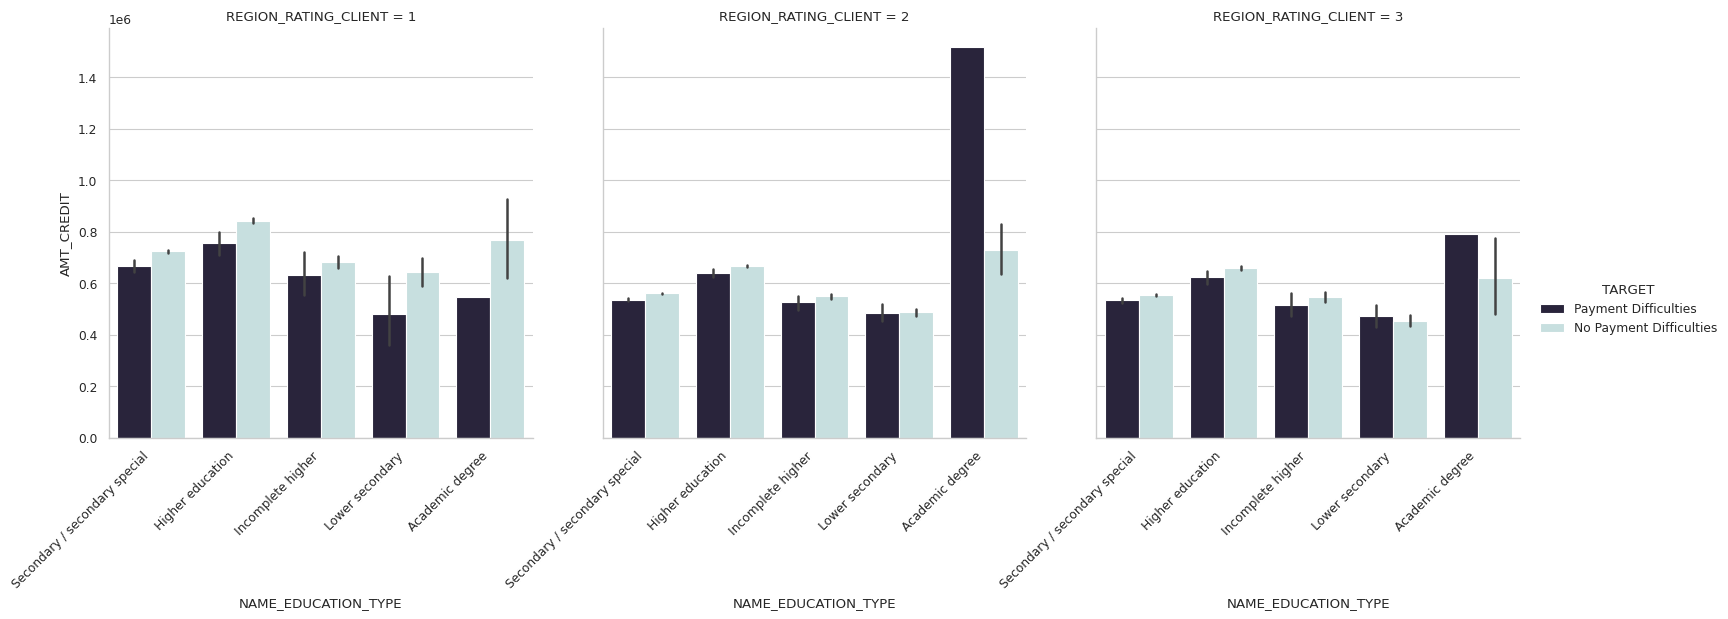

In [ ]:
# Catplot visualization: Relationship between 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', and 'TARGET'
fig = sns.catplot(
    x='NAME_EDUCATION_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Rotate x-axis labels for better readability
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

Clients with an academic degree who live in regions rated as 2 tend to face difficulties repaying loans when the credit amount is high. Meanwhile, clients with the same academic degree but residing in regions rated as 3 encounter repayment challenges for loans with a medium credit amount.

**3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives**

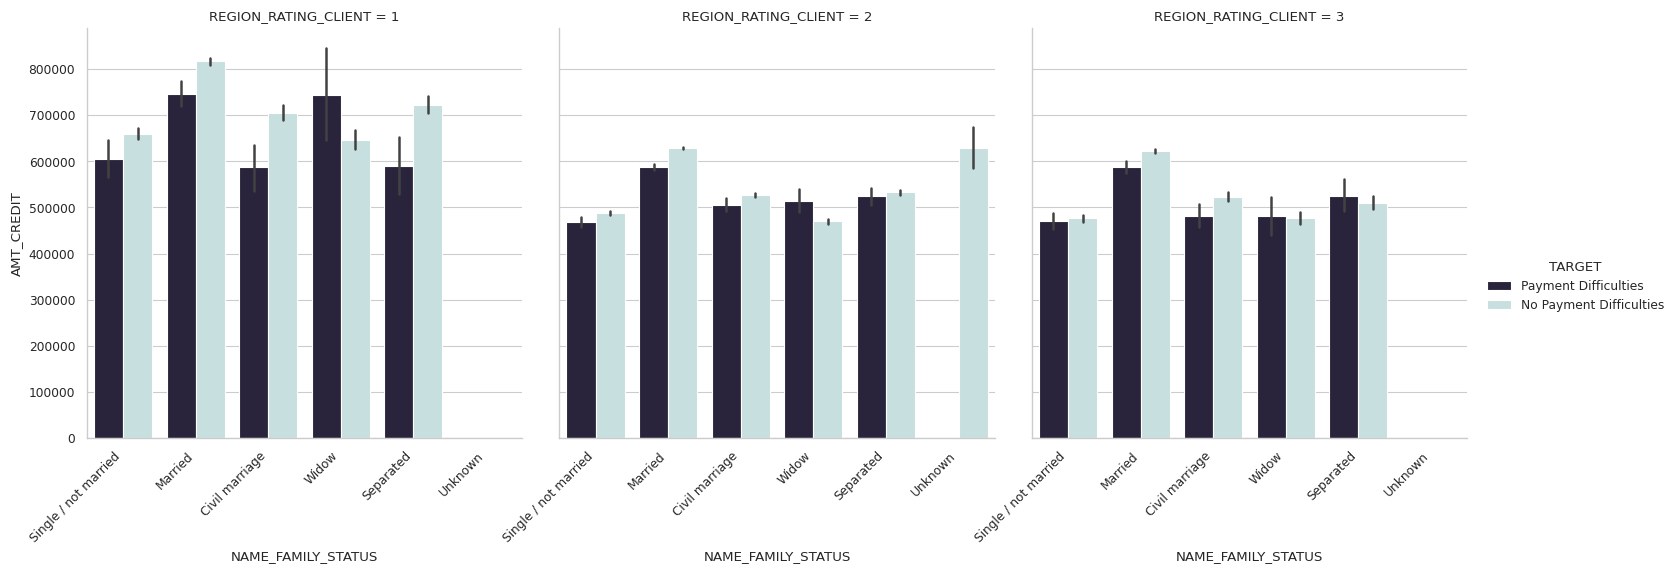

In [ ]:
# Catplot visualization: Relationship between 'NAME_FAMILY_STATUS', 'AMT_CREDIT', and 'TARGET'
fig = sns.catplot(
    x='NAME_FAMILY_STATUS',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='ch:start=0.2,rot=-.3_r',
    data=train
)

# Rotate x-axis labels for better readability
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

Clients with a family status of widowhood, regardless of whether they reside in regions rated 1, 2, or 3, tend to struggle with repaying loans for moderate to high credit amounts.

On the other hand, clients who are separated and live in regions with a rating of 3 face difficulties repaying loans for moderate credit amounts, compared to those living in regions rated 1 or 2, who experience fewer repayment issues.

## Data Cleaning


### Detecting Data Duplication


In [ ]:
print('The number of duplication is:', df_train.duplicated().sum())

The number of duplication is: 0


### Detecting Missing Values


In [ ]:
# Check for missing values in the DataFrame
print('Missing values status:', df_train.isnull().values.any())

# Create a DataFrame to summarize null values
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values'] / df_train.shape[0]) * 100

# Sort the DataFrame by percentage of null values in descending order and reset the index
nvc = nvc.sort_values(by='Percentage', ascending=False).reset_index()

# Display the result
print(nvc)

Missing values status: True
                            index  Total Null Values  Percentage
0                 COMMONAREA_MEDI             214865   69.872297
1                  COMMONAREA_AVG             214865   69.872297
2                 COMMONAREA_MODE             214865   69.872297
3        NONLIVINGAPARTMENTS_MODE             213514   69.432963
4         NONLIVINGAPARTMENTS_AVG             213514   69.432963
5        NONLIVINGAPARTMENTS_MEDI             213514   69.432963
6              FONDKAPREMONT_MODE             210295   68.386172
7           LIVINGAPARTMENTS_MODE             210199   68.354953
8            LIVINGAPARTMENTS_AVG             210199   68.354953
9           LIVINGAPARTMENTS_MEDI             210199   68.354953
10                  FLOORSMIN_AVG             208642   67.848630
11                 FLOORSMIN_MODE             208642   67.848630
12                 FLOORSMIN_MEDI             208642   67.848630
13               YEARS_BUILD_MEDI             204488   66.4977

In [ ]:
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [ ]:
# Check for missing values in the DataFrame after dropping some features
print('Missing values status:', df_train.isnull().values.any())

# Create a DataFrame to summarize null values
nvc = pd.DataFrame({
    'Total Null Values': df_train.isnull().sum().sort_values(),
    'Percentage': (df_train.isnull().sum().sort_values() / df_train.shape[0]) * 100
})

# Sort the DataFrame by percentage of null values in descending order and reset the index
nvc = nvc.sort_values(by='Percentage', ascending=False).reset_index()

# Display the result
print(nvc)

Missing values status: True
                          index  Total Null Values  Percentage
0               OCCUPATION_TYPE              96391   31.345545
1                  EXT_SOURCE_3              60965   19.825307
2    AMT_REQ_CREDIT_BUREAU_WEEK              41519   13.501631
3    AMT_REQ_CREDIT_BUREAU_HOUR              41519   13.501631
4     AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
5     AMT_REQ_CREDIT_BUREAU_QRT              41519   13.501631
6     AMT_REQ_CREDIT_BUREAU_MON              41519   13.501631
7    AMT_REQ_CREDIT_BUREAU_YEAR              41519   13.501631
8               NAME_TYPE_SUITE               1292    0.420148
9      OBS_30_CNT_SOCIAL_CIRCLE               1021    0.332021
10     DEF_30_CNT_SOCIAL_CIRCLE               1021    0.332021
11     OBS_60_CNT_SOCIAL_CIRCLE               1021    0.332021
12     DEF_60_CNT_SOCIAL_CIRCLE               1021    0.332021
13                 EXT_SOURCE_2                660    0.214626
14              AMT_GOODS_P

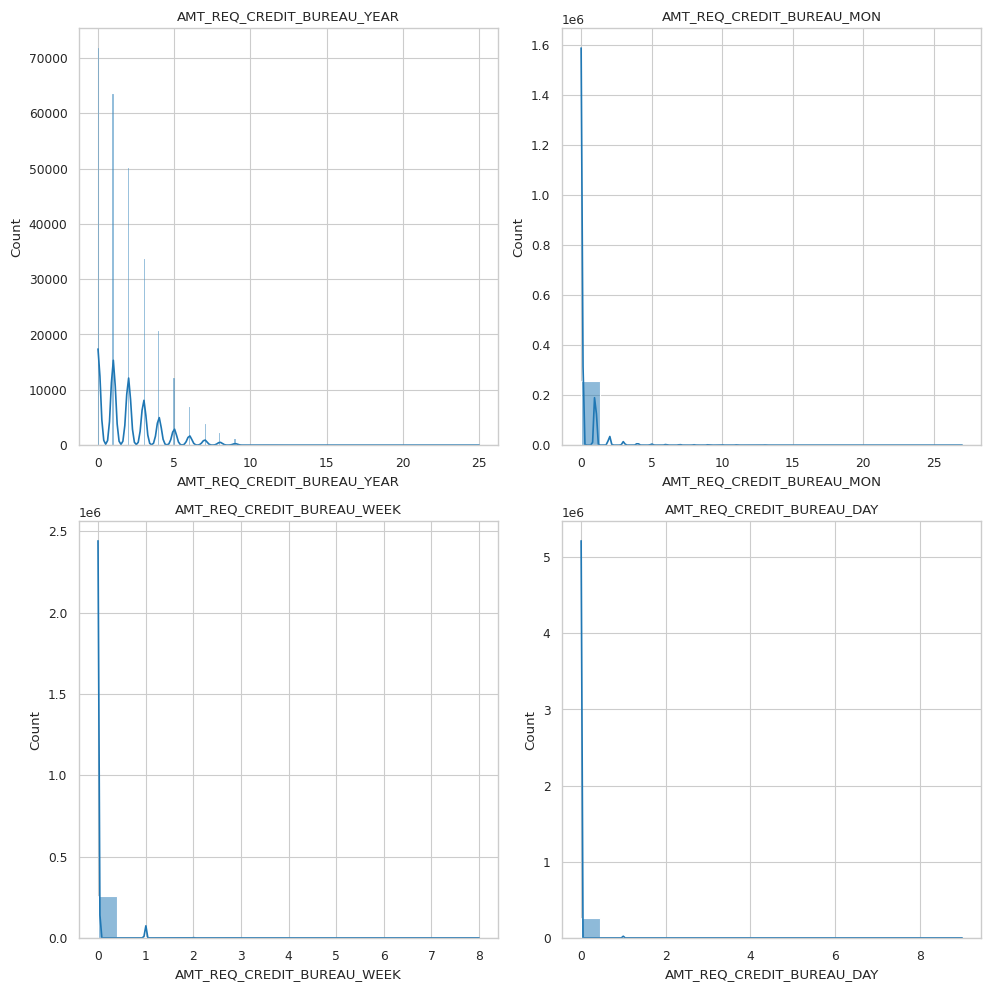

In [ ]:
# Distribution of numerical features with missing values (Part 1)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot distributions using sns.histplot
sns.histplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], kde=True, ax=ax[0][0])
ax[0][0].set_title('AMT_REQ_CREDIT_BUREAU_YEAR')

sns.histplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], kde=True, ax=ax[0][1])
ax[0][1].set_title('AMT_REQ_CREDIT_BUREAU_MON')

sns.histplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], kde=True, ax=ax[1][0])
ax[1][0].set_title('AMT_REQ_CREDIT_BUREAU_WEEK')

sns.histplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], kde=True, ax=ax[1][1])
ax[1][1].set_title('AMT_REQ_CREDIT_BUREAU_DAY')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

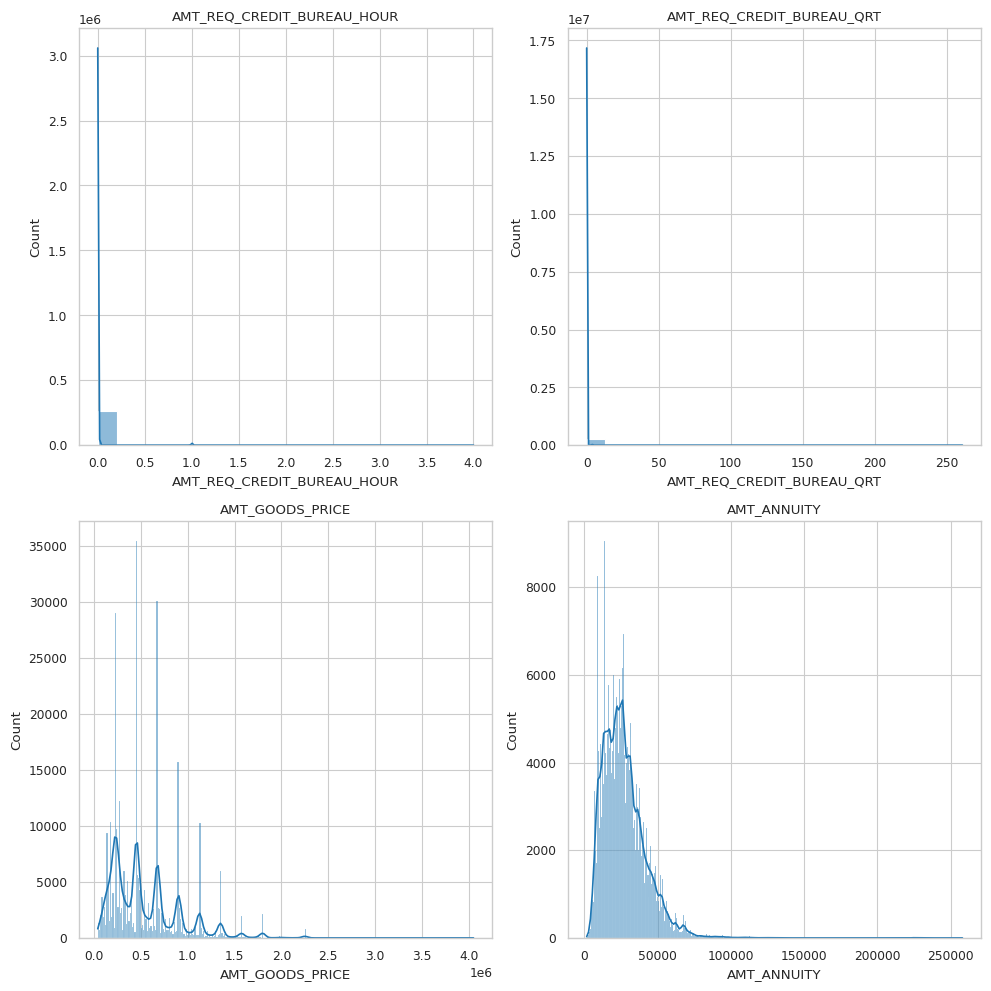

In [ ]:
# Distribution of numerical features with missing values (Part 2)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot distributions using sns.histplot
sns.histplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], kde=True, ax=ax[0][0])
ax[0][0].set_title('AMT_REQ_CREDIT_BUREAU_HOUR')

sns.histplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], kde=True, ax=ax[0][1])
ax[0][1].set_title('AMT_REQ_CREDIT_BUREAU_QRT')

sns.histplot(df_train['AMT_GOODS_PRICE'], kde=True, ax=ax[1][0])
ax[1][0].set_title('AMT_GOODS_PRICE')

sns.histplot(df_train['AMT_ANNUITY'], kde=True, ax=ax[1][1])
ax[1][1].set_title('AMT_ANNUITY')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

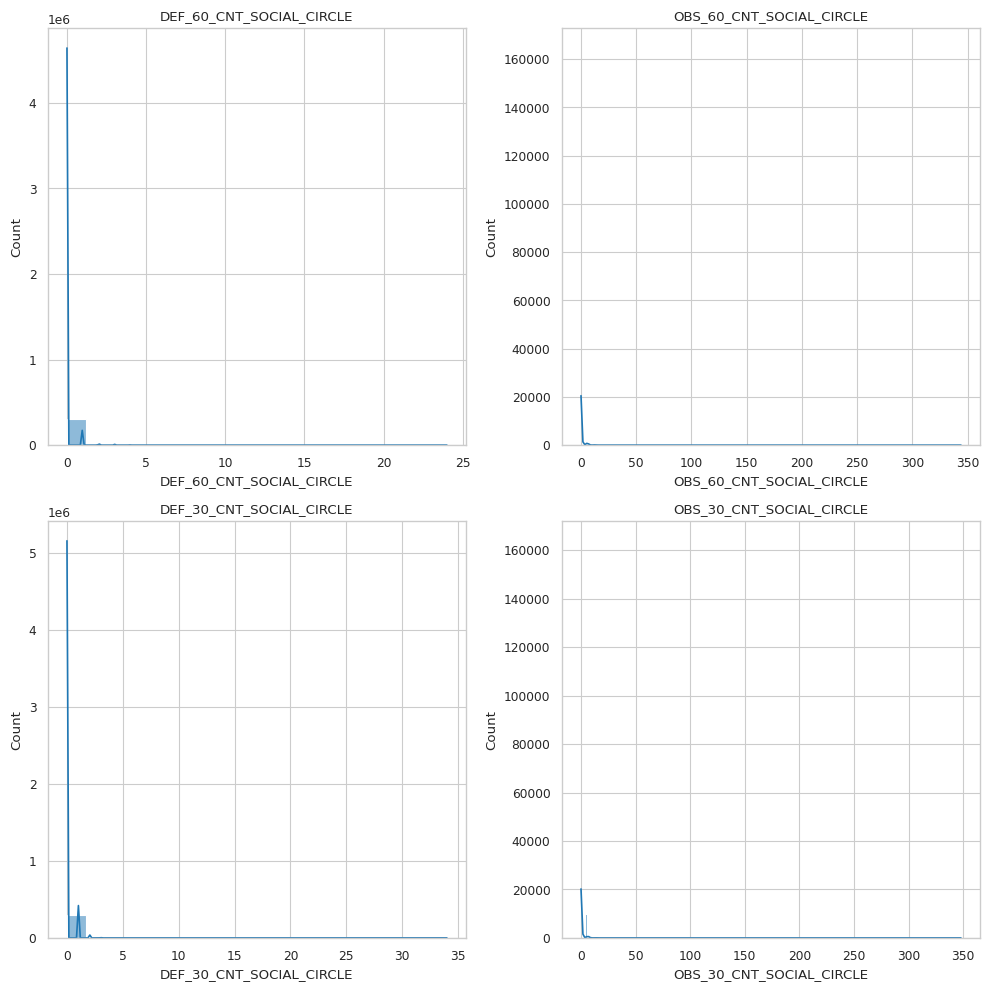

In [ ]:
# Distribution of numerical features with missing values (Part 3)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot distributions using sns.histplot
sns.histplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], kde=True, ax=ax[0][0])
ax[0][0].set_title('DEF_60_CNT_SOCIAL_CIRCLE')

sns.histplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], kde=True, ax=ax[0][1])
ax[0][1].set_title('OBS_60_CNT_SOCIAL_CIRCLE')

sns.histplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], kde=True, ax=ax[1][0])
ax[1][0].set_title('DEF_30_CNT_SOCIAL_CIRCLE')

sns.histplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], kde=True, ax=ax[1][1])
ax[1][1].set_title('OBS_30_CNT_SOCIAL_CIRCLE')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

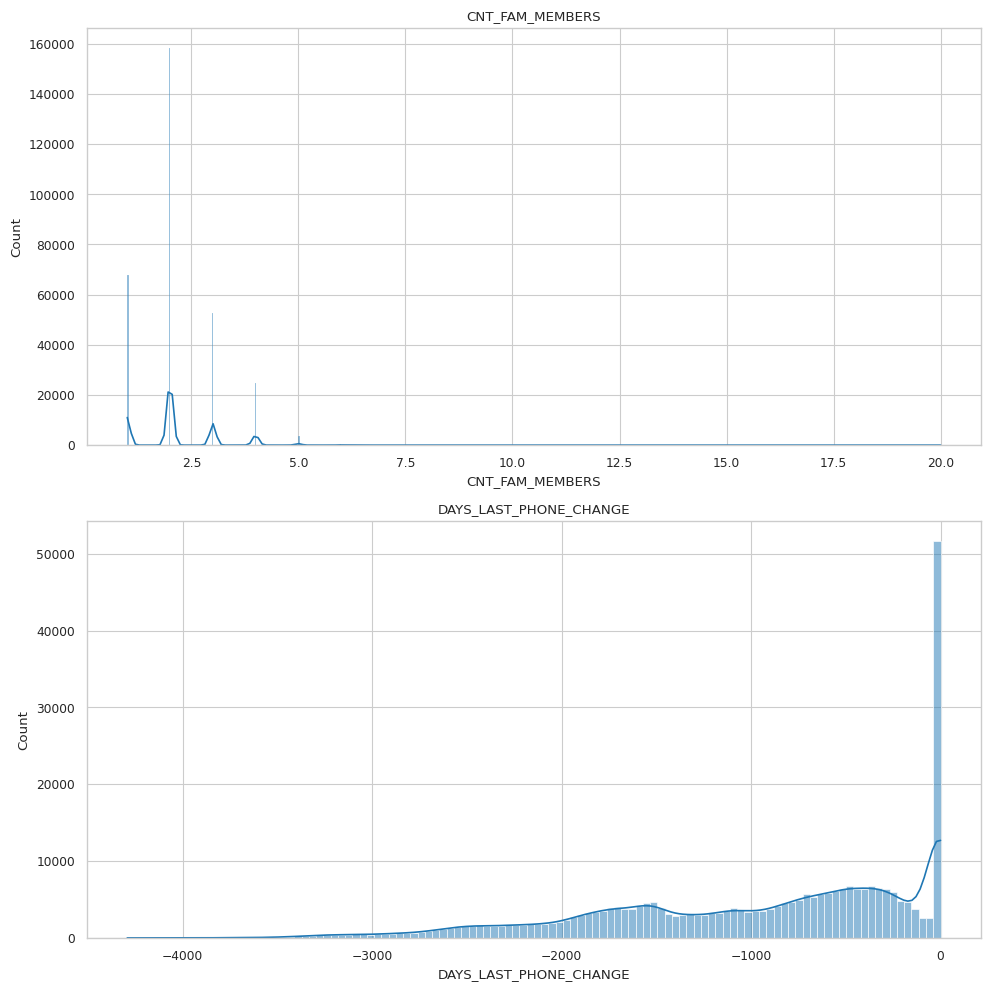

In [ ]:
# Distribution of numerical features with missing values (Part 3)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a 2-row grid of subplots
fig, ax = plt.subplots(2, figsize=(10, 10))

# Plot distributions using sns.histplot
sns.histplot(df_train['CNT_FAM_MEMBERS'], kde=True, ax=ax[0])
ax[0].set_title('CNT_FAM_MEMBERS')

sns.histplot(df_train['DAYS_LAST_PHONE_CHANGE'], kde=True, ax=ax[1])
ax[1].set_title('DAYS_LAST_PHONE_CHANGE')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

It is evident that the distribution of the aforementioned numerical features is skewed; therefore, the missing values in these features will be replaced with the median.

In [ ]:
# Impute missing values: median for numerical features, mode for categorical features

# Identify categorical and numerical columns
category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values
for column in df_train.columns:
    if df_train[column].isnull().any():
        if column in category_columns:
            # Fill missing values with mode for categorical features
            df_train[column] = df_train[column].fillna(df_train[column].mode()[0])
        elif column in numerical_columns:
            # Fill missing values with median for numerical features
            df_train[column] = df_train[column].fillna(df_train[column].median())

In [ ]:
# Check missing values status after imputation
print('Missing values status:', df_train.isnull().values.any())

# Display the number of missing values for each column (after imputation)
print('\nThe number of missing values for each column (after imputation):\n')

# Create a DataFrame to summarize missing values
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values'] / df_train.shape[0]) * 100

# Sort by percentage of missing values and reset the index
nvc = nvc.sort_values(by='Percentage', ascending=False).reset_index()

# Rename columns for clarity
nvc.columns = ['Column Name', 'Total Null Values', 'Percentage']

# Display the result
print(nvc)

Missing values status: False

The number of missing values for each column (after imputation):

                    Column Name  Total Null Values  Percentage
0                    SK_ID_CURR                  0         0.0
1        REG_CITY_NOT_WORK_CITY                  0         0.0
2               FLAG_DOCUMENT_8                  0         0.0
3               FLAG_DOCUMENT_7                  0         0.0
4               FLAG_DOCUMENT_6                  0         0.0
5               FLAG_DOCUMENT_5                  0         0.0
6               FLAG_DOCUMENT_4                  0         0.0
7               FLAG_DOCUMENT_3                  0         0.0
8               FLAG_DOCUMENT_2                  0         0.0
9        DAYS_LAST_PHONE_CHANGE                  0         0.0
10     DEF_60_CNT_SOCIAL_CIRCLE                  0         0.0
11     OBS_60_CNT_SOCIAL_CIRCLE                  0         0.0
12     DEF_30_CNT_SOCIAL_CIRCLE                  0         0.0
13     OBS_30_CNT_SOCI

### Detecting Outliers

In [ ]:
int_features = df_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

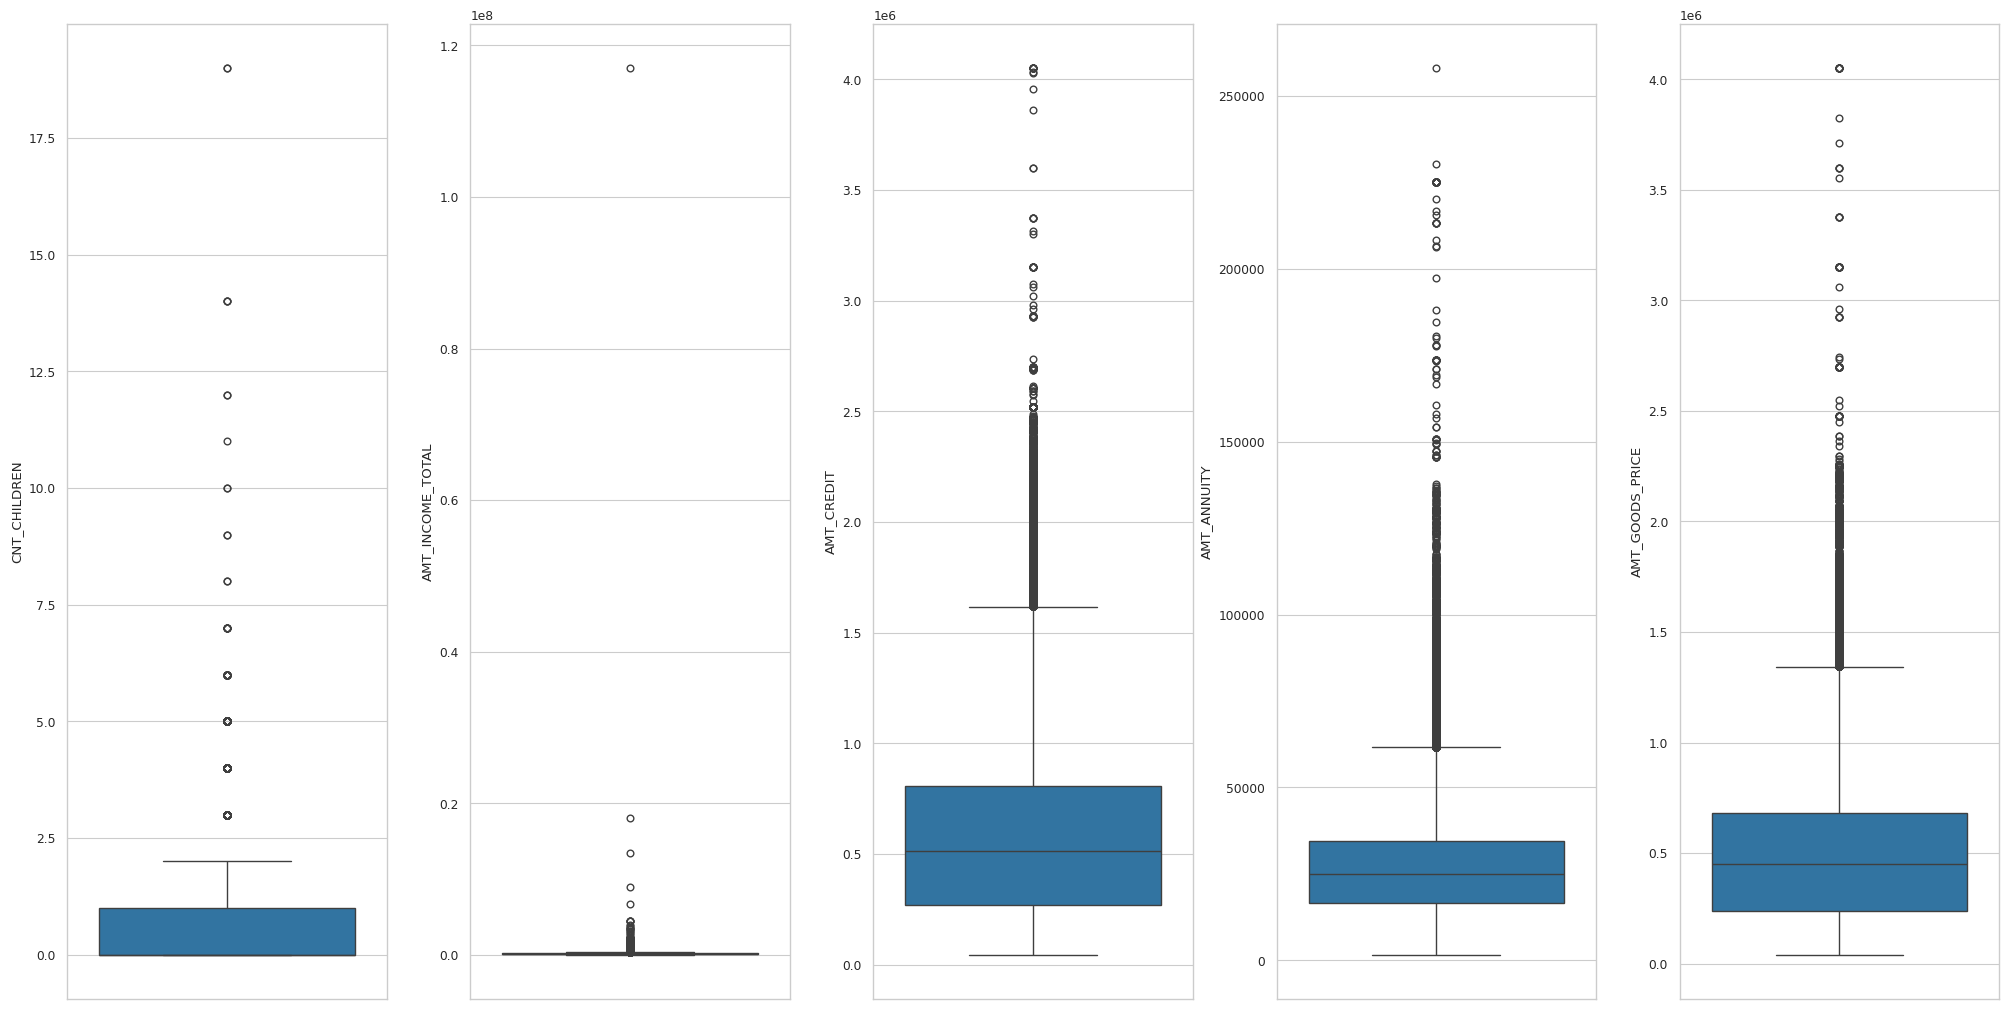

In [ ]:
# Create boxplots for numerical features
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

# Plot boxplots for the first 5 features in int_features
for index, (k, v) in enumerate(int_features.items()):
    if index == 5:  # Stop after 5 plots
        break
    sns.boxplot(y=k, data=int_features, ax=axs[index])

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

In [ ]:
int_features = df_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

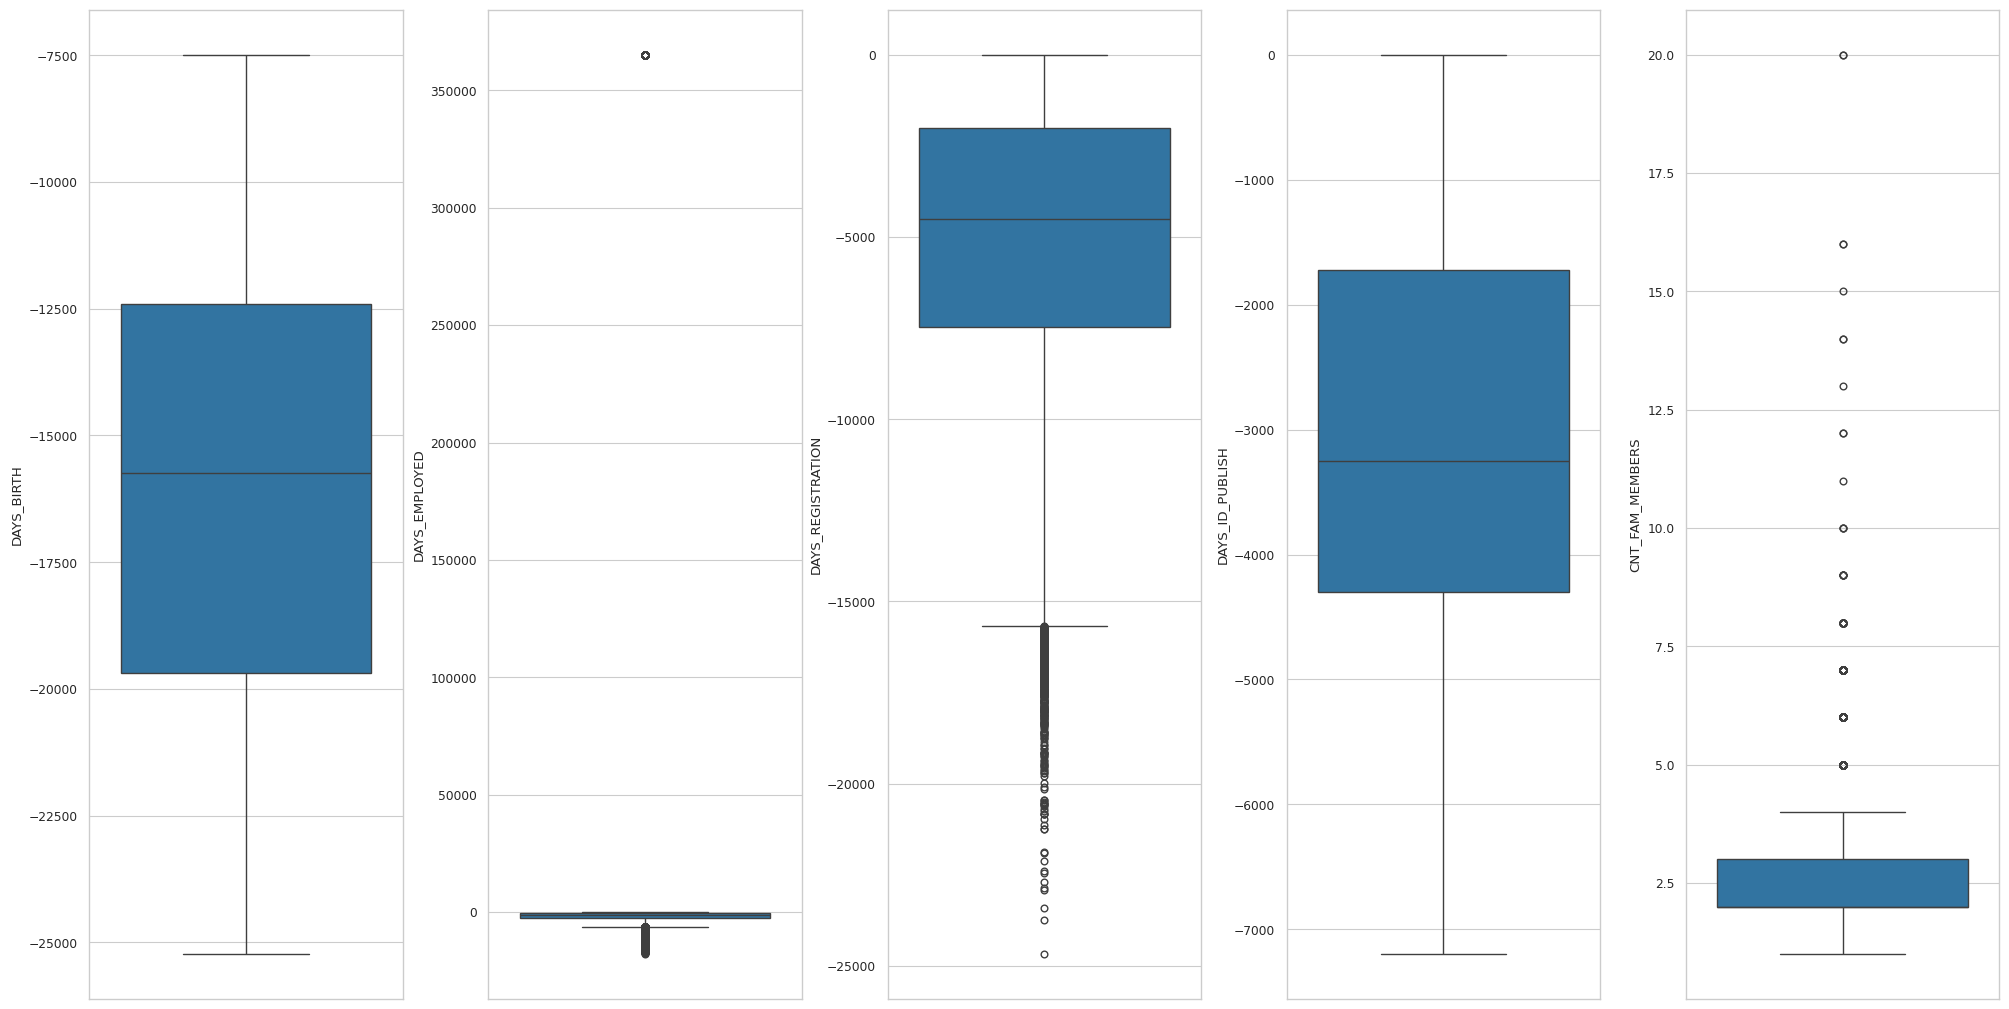

In [ ]:
# Create subplots for boxplots
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

# Plot boxplots for the first 5 features in int_features
for index, (k, v) in enumerate(int_features.items()):
    if index == 5:  # Stop after 5 plots
        break
    sns.boxplot(y=k, data=int_features, ax=axs[index])

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

In [ ]:
int_features = df_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

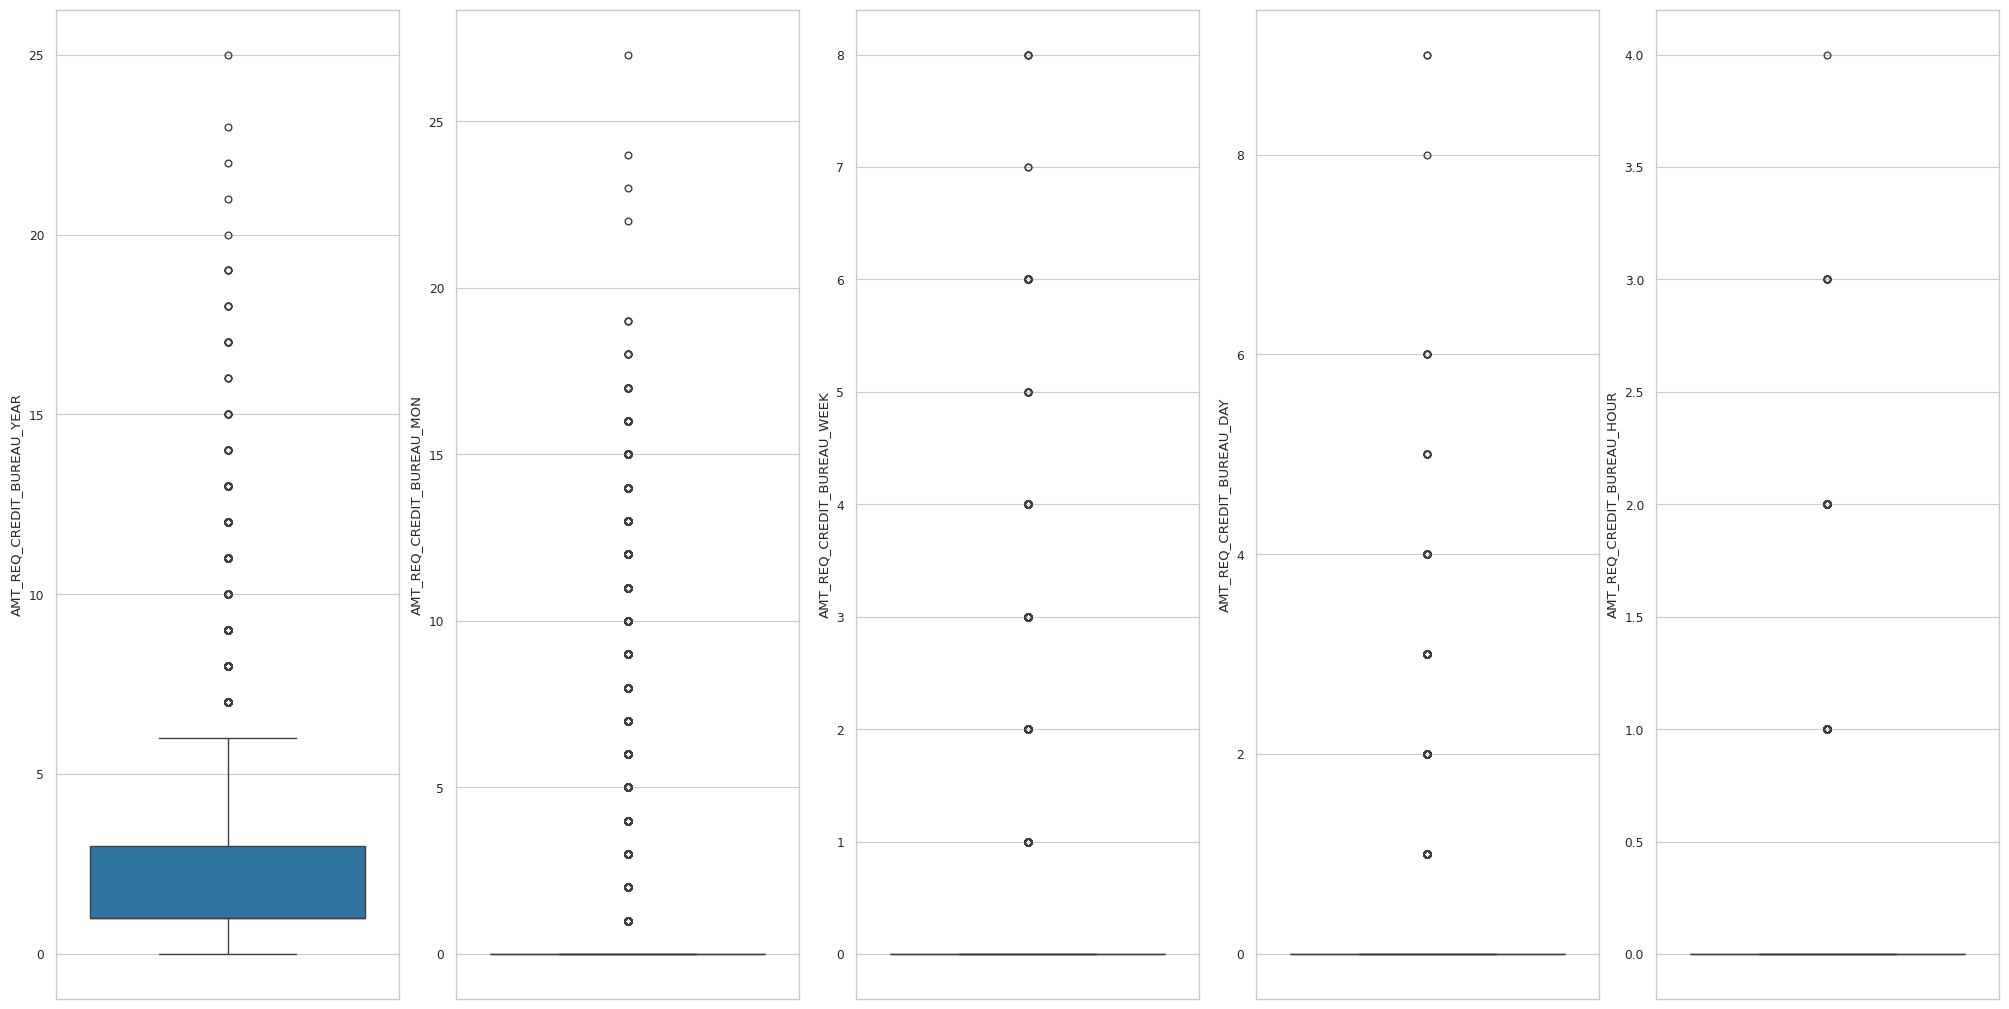

In [ ]:
# Create subplots for boxplots
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

# Plot boxplots for the first 5 features in int_features
for index, (k, v) in enumerate(int_features.items()):
    if index >= 5:  # Stop after 5 plots
        break
    sns.boxplot(y=k, data=int_features, ax=axs[index])

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

In [ ]:
int_features = df_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

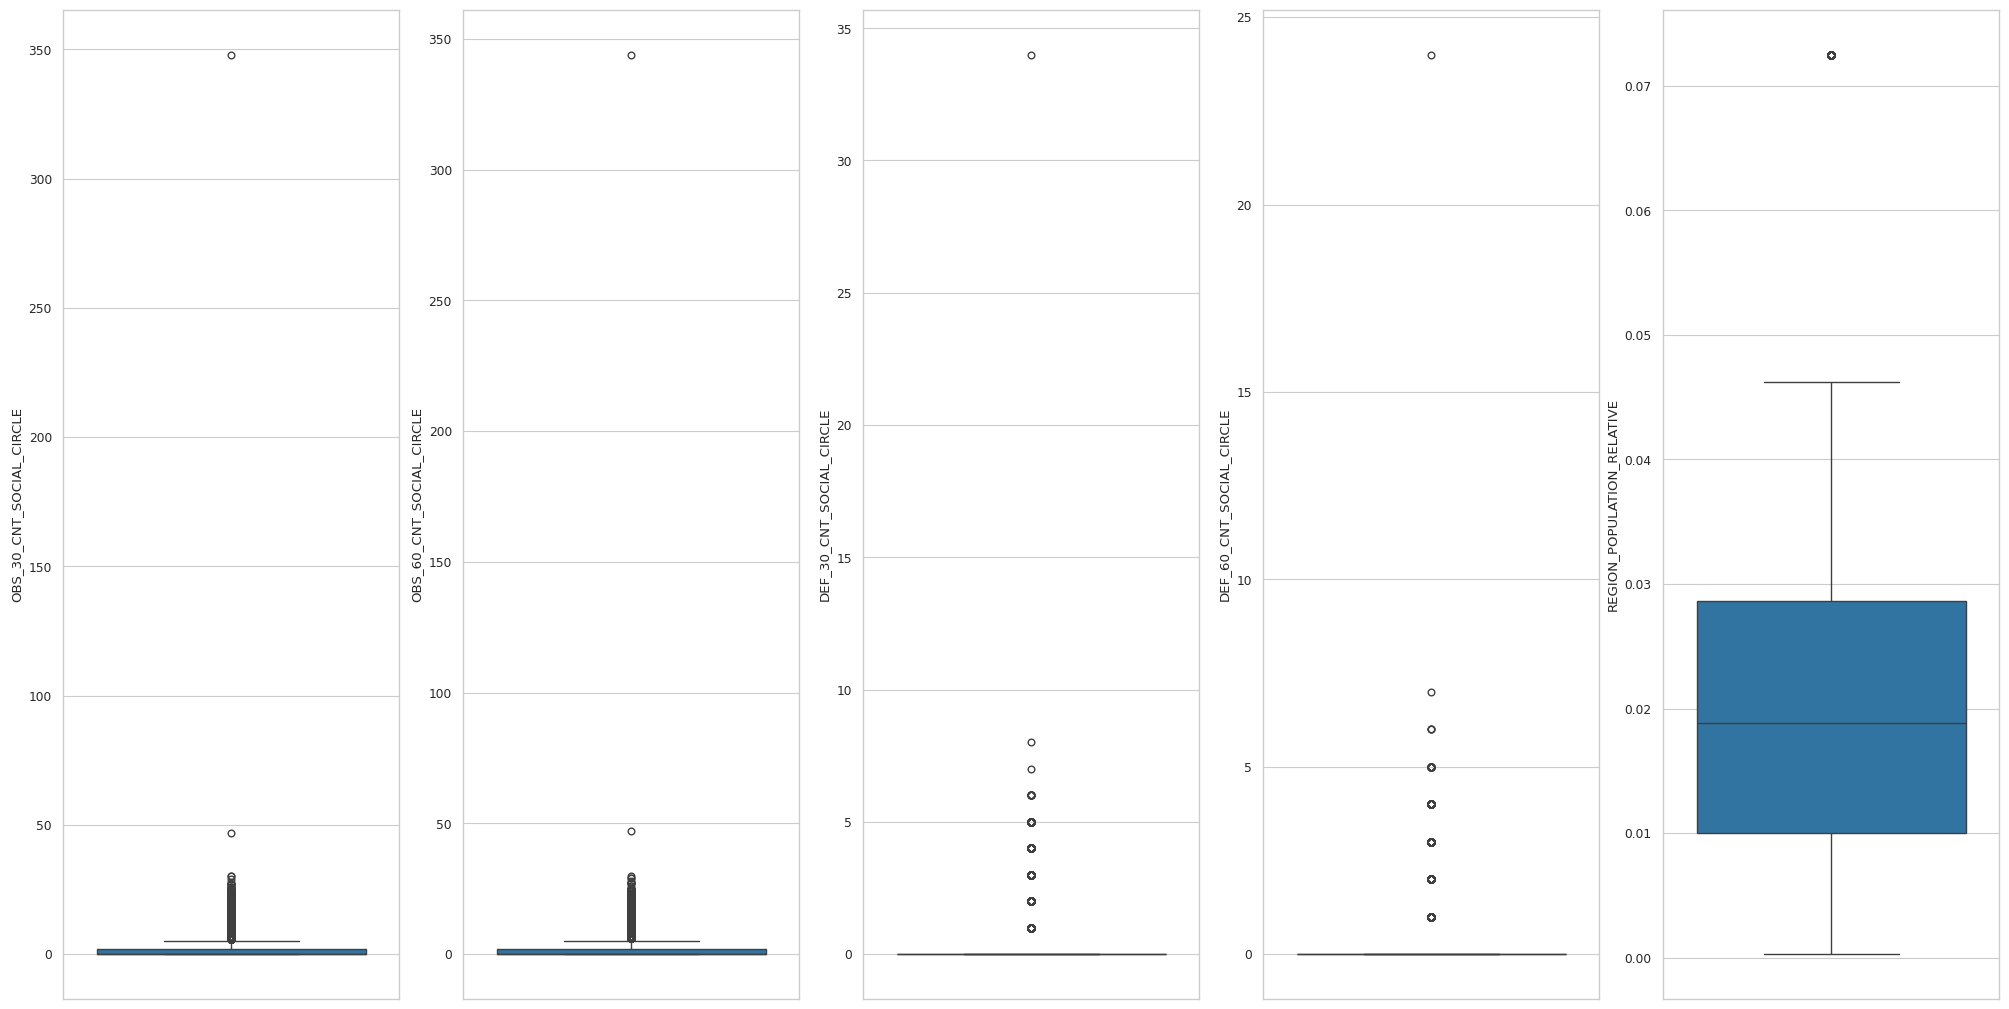

In [ ]:
# Create subplots for boxplots
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

# Plot boxplots for the first 5 features in int_features
for index, (k, v) in enumerate(int_features.items()):
    if index == 5:  # Stop after 5 plots
        break
    sns.boxplot(y=k, data=int_features, ax=axs[index])

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

In [ ]:
int_features = df_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

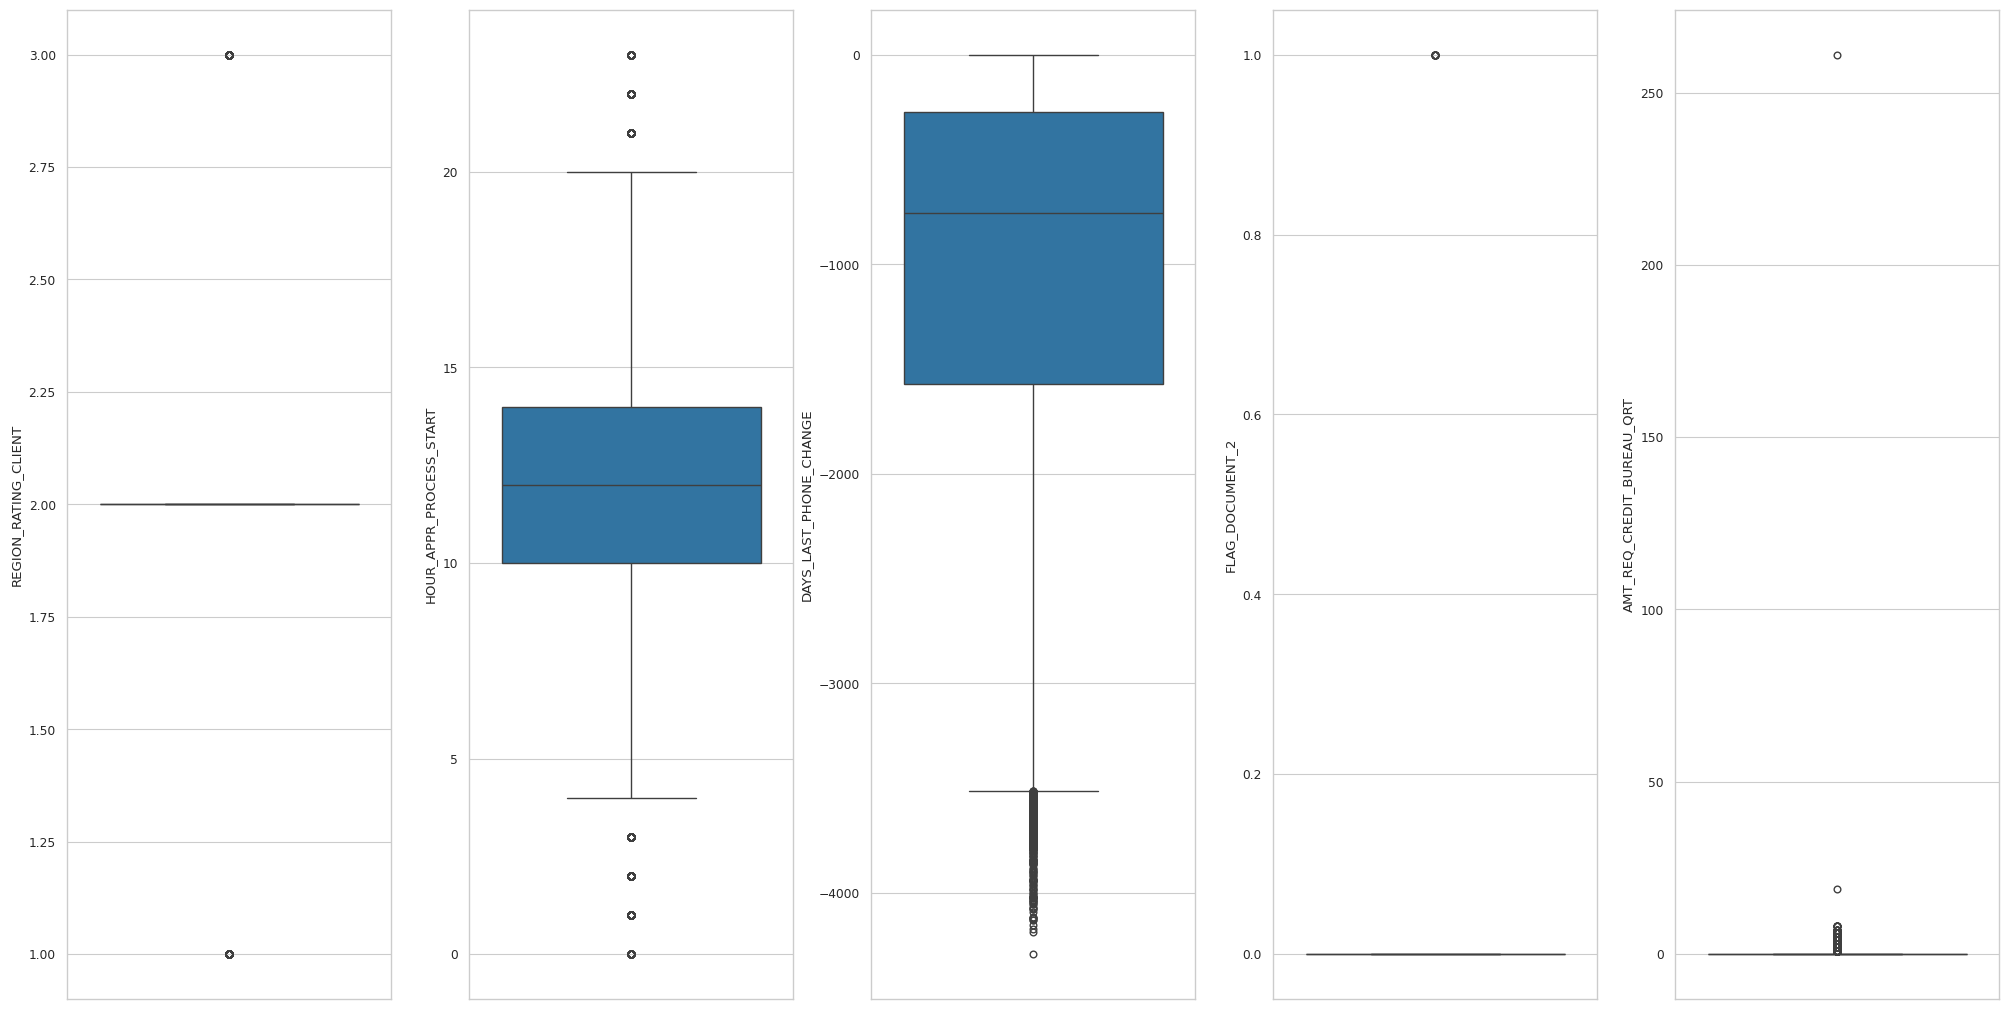

In [ ]:
# Create subplots for boxplots
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

# Plot boxplots for the first 5 features in int_features
for index, (k, v) in enumerate(int_features.items()):
    if index == 5:  # Stop after 5 plots
        break
    sns.boxplot(y=k, data=int_features, ax=axs[index])

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Show the plot
plt.show()

Outliers in the aforementioned numerical features will be retained, as they may provide valuable insights that could enhance the analysis.

## Machine Learning Models


### Label Encoding


In [ ]:
# Label encoding for object features
columns_to_encode = [
    "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
    "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"
]

# Apply LabelEncoder to the selected columns
df_train[columns_to_encode] = df_train[columns_to_encode].apply(LabelEncoder().fit_transform)

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

#### Drop Unnecessary Feature

In [ ]:
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [ ]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert Negative Values to Positive Values


The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE


In [ ]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

#### Feature Selection

In [ ]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [ ]:
# Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest to select the top 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x, y)

# Create a DataFrame to store feature scores
dfscores = pd.DataFrame(fit.scores_, columns=['Score'])
dfcolumns = pd.DataFrame(x.columns, columns=['Features'])

# Combine feature names and their scores into a single DataFrame
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Sort features by their scores in descending order
featureScores = featureScores.sort_values(by='Score', ascending=False)

# Display the results
print('The features that correlate well with the target feature:\n')
print(featureScores)

The features that correlate well with the target feature:

                       Features         Score
16                DAYS_EMPLOYED  1.954124e+08
8               AMT_GOODS_PRICE  1.223080e+08
6                    AMT_CREDIT  7.669987e+07
15                   DAYS_BIRTH  2.235391e+06
5              AMT_INCOME_TOTAL  1.624102e+06
17            DAYS_REGISTRATION  1.348566e+06
44       DAYS_LAST_PHONE_CHANGE  6.656876e+05
18              DAYS_ID_PUBLISH  6.195946e+05
7                   AMT_ANNUITY  3.913092e+05
37            ORGANIZATION_TYPE  4.138607e+03
10             NAME_INCOME_TYPE  9.349036e+02
35       REG_CITY_NOT_WORK_CITY  6.153774e+02
1                   CODE_GENDER  6.056293e+02
38                 EXT_SOURCE_2  5.594802e+02
34       REG_CITY_NOT_LIVE_CITY  5.587089e+02
11          NAME_EDUCATION_TYPE  4.867541e+02
41     DEF_30_CNT_SOCIAL_CIRCLE  4.491174e+02
39                 EXT_SOURCE_3  4.424617e+02
43     DEF_60_CNT_SOCIAL_CIRCLE  3.978737e+02
36      LIVE_CITY_NOT

###Handling Data Imbalance


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train['TARGET'] == 0]
df_minority = df_train[df_train['TARGET'] == 1]

# Upsample the minority class to match the majority class size
df_minority_upsampled = resample(
    df_minority,
    replace=True,          # Sample with replacement
    n_samples=len(df_majority),  # Match the majority class size
    random_state=42        # Ensure reproducibility
)

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the class distribution after upsampling
print("Class distribution after upsampling:")
print(df_upsampled['TARGET'].value_counts())

Class distribution after upsampling:
TARGET
0    282686
1    282686
Name: count, dtype: int64


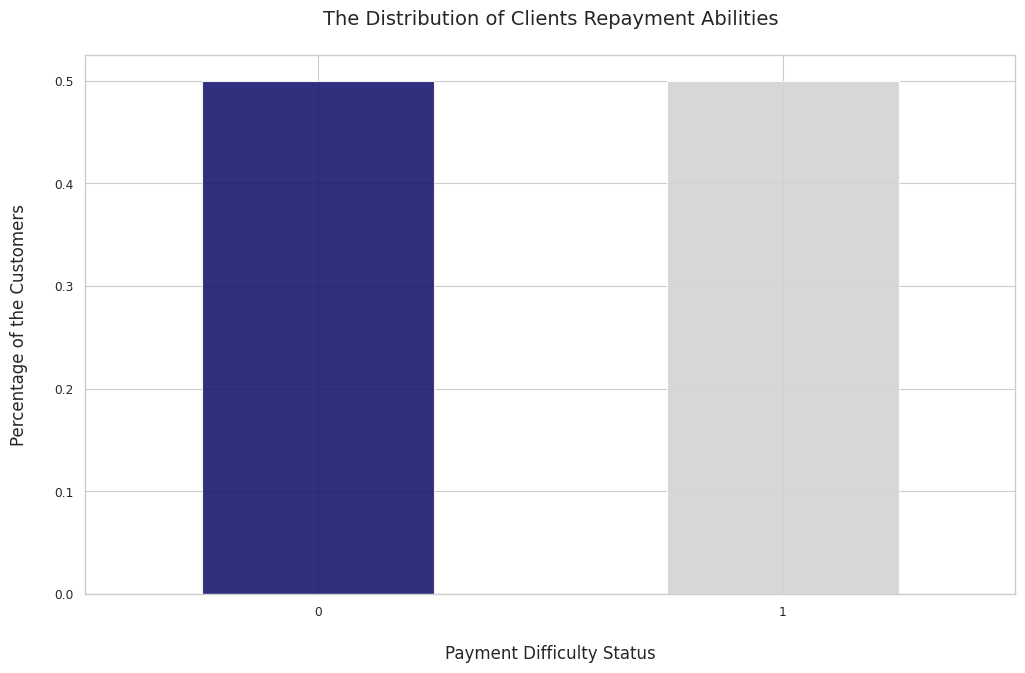

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the bar plot
fig = plt.figure(figsize=(12, 7))

# Plot the normalized value counts of the TARGET variable
df_upsampled['TARGET'].value_counts(normalize=True).plot(
    kind='bar',
    color=['midnightblue', 'lightgrey'],
    alpha=0.9,
    rot=0
)

# Set the title and labels
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)

# Display the plot
plt.show()

### Data Splitting

In [ ]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Building

The following algorithms will be evaluated to identify the most effective model:

- Logistic Regression
- Gaussian Naive Bayes
- Decision Tree
- Random Forest

**1. Logistic Regression**

In [ ]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [ ]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226112
           1       0.68      0.66      0.67    226185

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



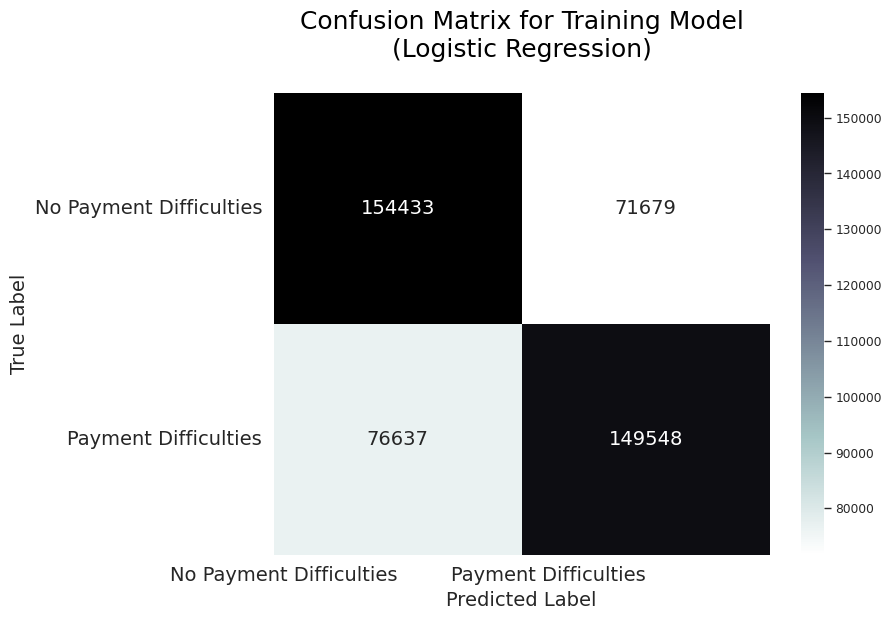

In [ ]:
# Create confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame(
    confusion_matrix(y_train, y_train_pred_log),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_log,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56574
           1       0.68      0.66      0.67     56501

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



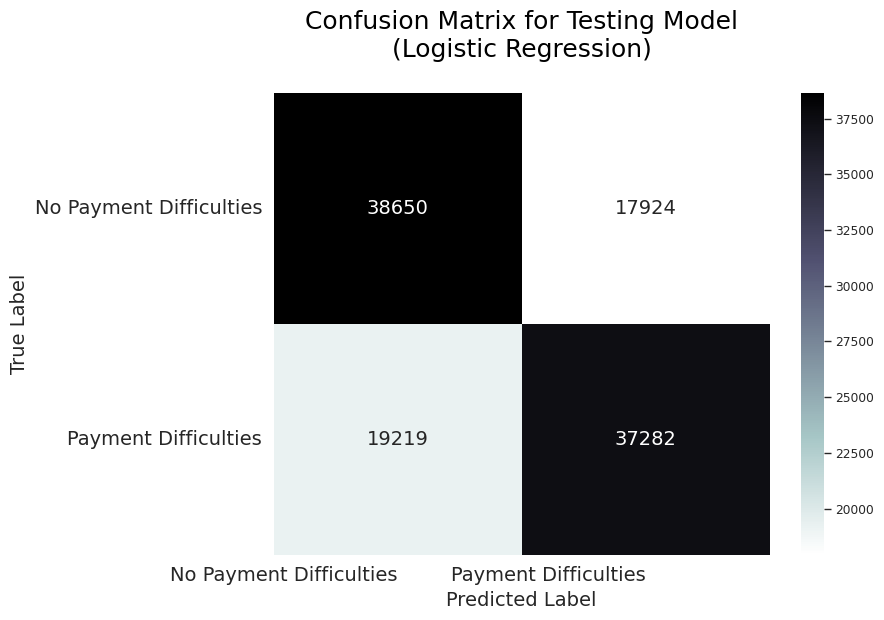

In [ ]:
# Create confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred_log),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_log,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:

acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.21
Test Accuracy: % 67.15


In [ ]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6715


**2. Gaussian Naive Bayes**

In [ ]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [ ]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.57      0.84      0.68    226112
           1       0.70      0.35      0.47    226185

    accuracy                           0.60    452297
   macro avg       0.63      0.60      0.57    452297
weighted avg       0.63      0.60      0.57    452297



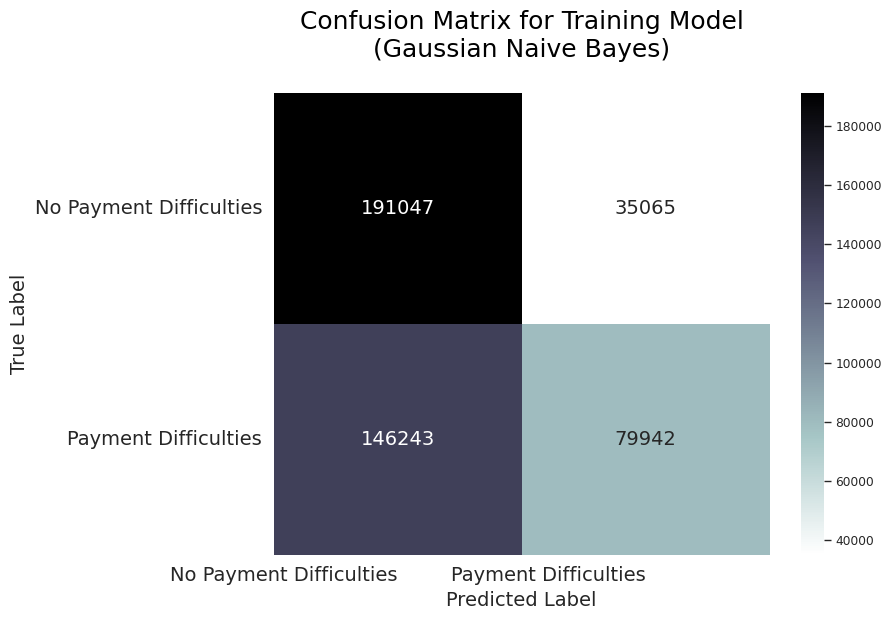

In [ ]:
# Create confusion matrix as a DataFrame
confusion_matrix_gnb = pd.DataFrame(
    confusion_matrix(y_train, y_train_pred_gnb),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_gnb,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.57      0.82      0.67     56574
           1       0.68      0.38      0.49     56501

    accuracy                           0.60    113075
   macro avg       0.62      0.60      0.58    113075
weighted avg       0.62      0.60      0.58    113075



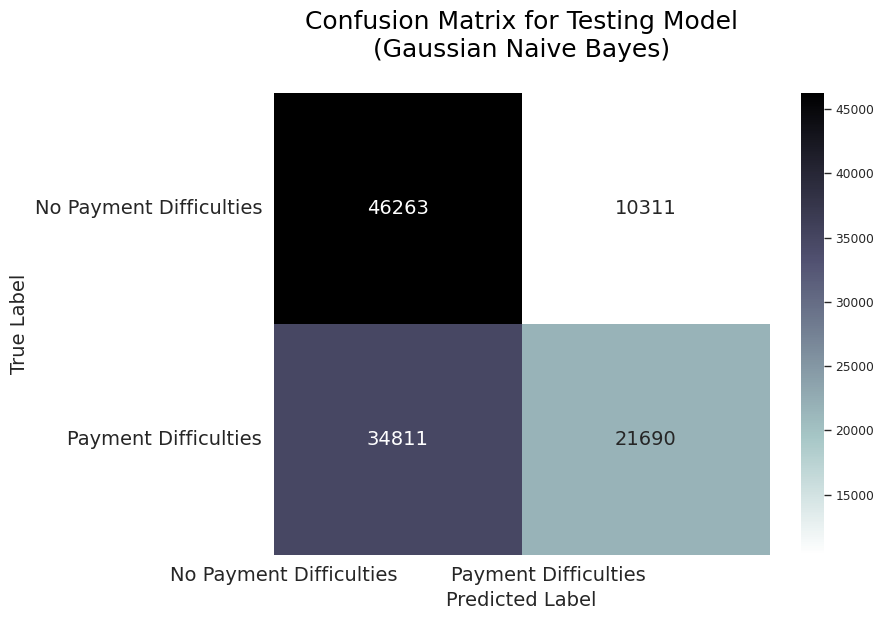

In [ ]:

# Create confusion matrix as a DataFrame
confusion_matrix_gnb = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred_gnb),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_gnb,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 59.91
Test Accuracy: % 60.1


In [ ]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.6008


**3. Decision Tree**

In [ ]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226112
           1       1.00      1.00      1.00    226185

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



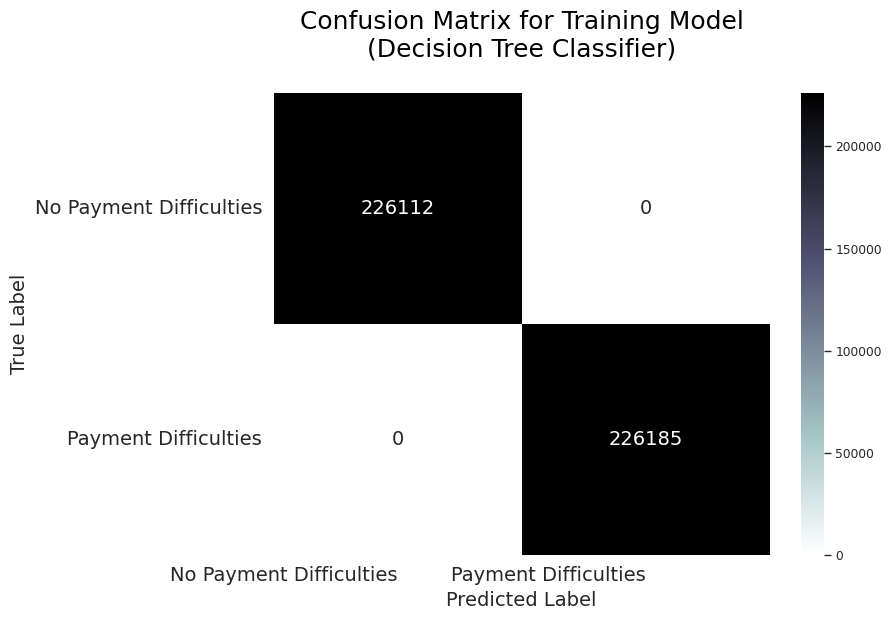

In [ ]:
# Create confusion matrix as a DataFrame
confusion_matrix_dt = pd.DataFrame(
    confusion_matrix(y_train, y_train_pred_dt),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_dt,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     56574
           1       0.90      0.80      0.84     56501

    accuracy                           0.85    113075
   macro avg       0.86      0.85      0.85    113075
weighted avg       0.86      0.85      0.85    113075



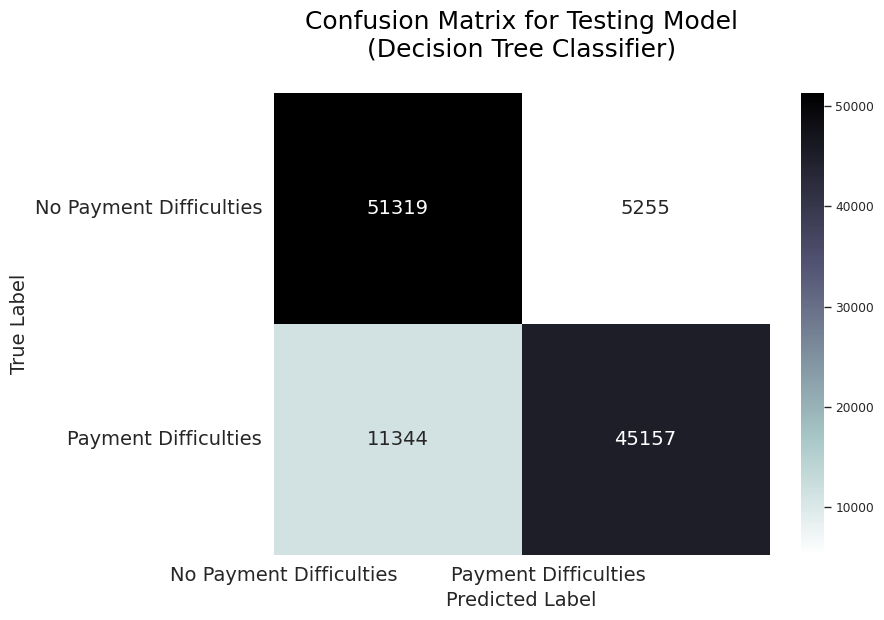

In [ ]:
# Create confusion matrix as a DataFrame
confusion_matrix_dt = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred_dt),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_dt,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 85.32


In [ ]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8532


**4. Random Forest**

In [ ]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [ ]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226112
           1       1.00      1.00      1.00    226185

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



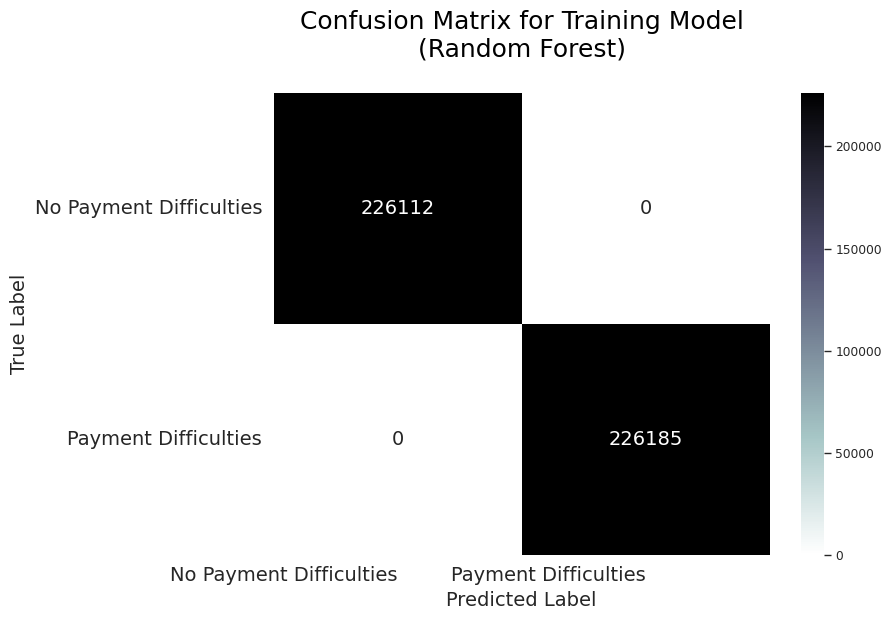

In [ ]:

# Create confusion matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame(
    confusion_matrix(y_train, y_train_pred_dt),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_rf,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56574
           1       0.99      1.00      1.00     56501

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



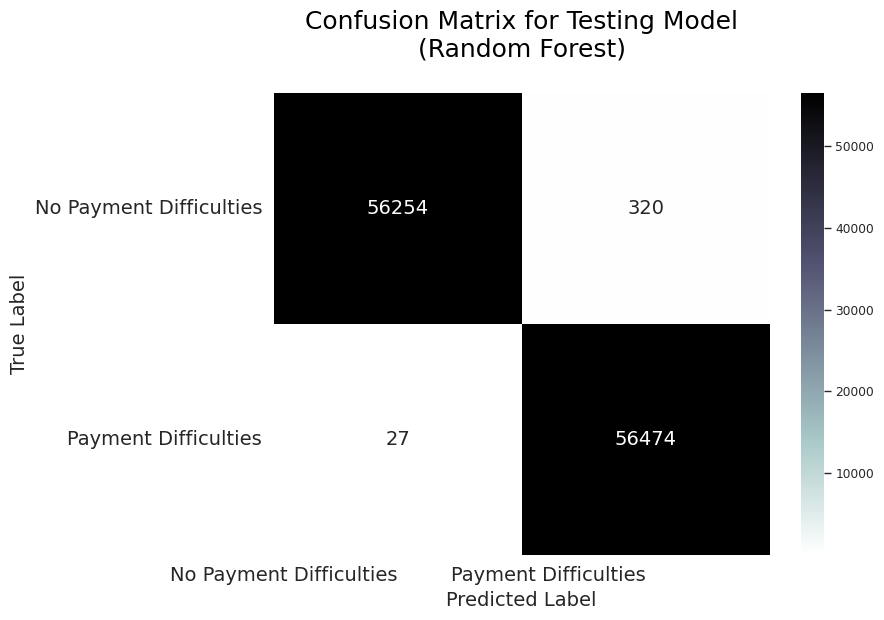

In [ ]:

# Create confusion matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred_rf),
    index=['No Payment Difficulties', 'Payment Difficulties'],
    columns=['No Payment Difficulties', 'Payment Difficulties']
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    confusion_matrix_rf,
    annot=True,
    annot_kws={'size': 14},
    fmt='d',
    cmap='bone_r'
)

# Customize tick labels
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(),
    rotation=0,
    ha='right',
    fontsize=14
)

# Add title and axis labels
plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Display the plot
plt.show()

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.69


In [ ]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9969


####  Model Selection

In [ ]:
import pandas as pd

# Create the results DataFrame
results = pd.DataFrame(
    [
        ["Logistic Regression", 0.6721, 0.6715, 0.6715],
        ["Gaussian Naive Bayes", 0.5991, 0.601, 0.6008],
        ["Decision Tree", 1, 0.8532, 0.8532],
        ["Random Forest", 1, 0.9969, 0.9969]
    ],
    columns=["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"]
)

# Sort the DataFrame by Training and Testing Accuracy Scores in descending order
sorted_results = results.sort_values(
    by=["Training Accuracy Score", "Testing Accuracy Score"],
    ascending=False
)

# Apply a background gradient for better visualization
styled_results = sorted_results.style.background_gradient(cmap='Blues')

# Display the styled DataFrame
styled_results

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.000000,0.996900,0.996900
2,Decision Tree,1.000000,0.853200,0.853200
0,Logistic Regression,0.672100,0.671500,0.671500
1,Gaussian Naive Bayes,0.599100,0.601000,0.600800


The prediction accuracy for both the training and testing datasets in the Random Forest model shows minimal difference, indicating that the model performs exceptionally well. This balance suggests the absence of underfitting or overfitting. As a result, the Random Forest model was selected as the optimal choice for predicting clients' repayment capabilities.

## Data Aplication (Test)

In [ ]:
# Load the test dataset
df_test = pd.read_csv("application_test.csv", sep=',')

# Print the shape of the dataset
print('This dataset has %d rows and %d columns.\n' % df_test.shape)

# Display the first few rows of the dataset
df_test.head()

This dataset has 48744 rows and 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## Data Preprocessing

### Detecting Duplication

In [ ]:
print('The number of duplication is:', df_test.duplicated().sum())

The number of duplication is: 0


### Detecting Missing Values

In [ ]:
# Check for missing values in the dataset
print('Missing values status:', df_test.isnull().values.any())

# Create a DataFrame to summarize total null values and their percentages
null_values_summary = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
null_values_summary['Percentage'] = (null_values_summary['Total Null Values'] / df_test.shape[0]) * 100

# Sort the summary by percentage of null values in descending order and reset the index
null_values_summary = null_values_summary.sort_values(by='Percentage', ascending=False).reset_index()

# Display the summary
null_values_summary

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MODE,32780,67.249302
9,LIVINGAPARTMENTS_MEDI,32780,67.249302


In [ ]:
# Drop features that have a large number of missing values (± 50%)
# Dropping columns from index 43 to 89
df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)

# Dropping specific columns with high missing values
df_test.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], inplace=True, axis=1)

In [ ]:
# Check for missing values in the dataset after dropping features
print('Missing values status:', df_test.isnull().values.any())

# Create a DataFrame to summarize total null values and their percentages
null_values_summary = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
null_values_summary['Percentage'] = (null_values_summary['Total Null Values'] / df_test.shape[0]) * 100

# Sort the summary by percentage of null values in descending order and reset the index
null_values_summary = null_values_summary.sort_values(by='Percentage', ascending=False).reset_index()

# Display the summary
null_values_summary

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
5,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
6,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
7,AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.409732
8,NAME_TYPE_SUITE,911,1.868948
9,OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495


In [ ]:
# Separate categorical and numerical columns
category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values
for column in df_test.columns:
    if df_test[column].isnull().any():
        if column in category_columns:
            # Fill missing values in categorical columns with the mode
            df_test[column] = df_test[column].fillna(df_test[column].mode()[0])
        else:
            # Fill missing values in numerical columns with the median
            df_test[column] = df_test[column].fillna(df_test[column].median())

In [ ]:
# Check for missing values in the dataset after imputation
print('Missing values status:', df_test.isnull().values.any())

# Create a DataFrame to summarize total null values and their percentages
null_values_summary = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
null_values_summary['Percentage'] = (null_values_summary['Total Null Values'] / df_test.shape[0]) * 100

# Sort the summary by percentage of null values in descending order and reset the index
null_values_summary = null_values_summary.sort_values(by='Percentage', ascending=False).reset_index()

# Display the summary
null_values_summary

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


### Label Encoding

In [ ]:
# List of object features to encode
object_features = [
    "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"
]

# Apply LabelEncoder to each object feature
label_encoder = LabelEncoder()
df_test[object_features] = df_test[object_features].apply(lambda col: label_encoder.fit_transform(col))

In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### Convert Negative Values to Positive Values


In [ ]:
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

### Prediction

Use the best-performing machine learning model, namely the Random Forest, to predict clients' repayment abilities on the test application data.

In [ ]:
# Select specific columns for prediction
selected_features = [
    'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH',
    'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE',
    'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'EXT_SOURCE_2',
    'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY'
]

# Create a new DataFrame with the selected features
pred_test = df_test[selected_features]

# Display the first few rows of the new DataFrame
pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [ ]:
# Make predictions using the trained model
predict = pd.Series(rf_model.predict(pred_test), name="TARGET").astype(int)

# Combine predictions with the corresponding IDs
results = pd.concat([df_test['SK_ID_CURR'], predict], axis=1)

# Save the results to a CSV file
results.to_csv("predict_application.csv", index=False)

# Display the first few rows of the results
results.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


## Recommendation

1. **Tailored Marketing Campaigns**  
   - Highlight loan benefits that resonate with each target group. For example:
     - **Students**: Emphasize flexible repayment options and low-interest rates to support their education or career development.
     - **Accountants and High-Skilled Tech Staff**: Showcase how loans can help with professional certifications, skill upgrades, or starting a side business.
     - **Managers**: Focus on loans for investments, home improvements, or other financial goals that align with their career stability.

2. **Survey and Analysis for Special Cases**  
   Conduct a survey to identify potential challenges faced by clients on maternity leave or those who are unemployed when applying for cash loan contracts. This analysis will help in:
   - Understanding their financial needs and repayment capabilities.
   - Designing specific loan products or recommending suitable contract types to increase approval rates for these clients.

3. **Targeting Priority Clients**  
   Data analysis shows that clients aged **35-45 years** are less likely to face payment difficulties. Prioritize this age group in marketing campaigns by:
   - Offering exclusive benefits, such as lower interest rates or faster approval processes.
   - Highlighting their financial stability as a key factor in loan approval.